In [1]:
import pandas as pd;import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from iso3166 import countries

import sidetable as stb

from IPython.display import HTML, display
import tabulate
%matplotlib inline

In [2]:
#!pip install sidetable

In [3]:
#pip install tabulate

In [4]:
#!pip install iso3166 # To get the country name from country code

In [5]:
pd.set_option('display.max_columns', None)

## Load the data and high level validattion

In [6]:
HotelDf = pd.read_csv('hotel_bookings.csv') # Load the provided CSV file using the pandas pacakge
HotelDf.head(5) # List the first 5 values fromt he data

,hotel,is_canceled,booking_date,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_customer,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,totalno_of_special_requests
0,type_2,0,24-07-2017,01-07-2018,0,0,2,0,Only Breakfast,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0,0
1,type_2,0,24-06-2016,01-07-2018,0,0,2,0,Only Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0,0
2,type_2,0,24-06-2018,01-07-2018,0,1,1,0,Only Breakfast,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,0,0
3,type_2,0,18-06-2018,01-07-2018,0,1,1,0,Only Breakfast,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,0,0
4,type_2,0,17-06-2018,01-07-2018,0,2,2,0,Only Breakfast,GBR,Online Travel Agents,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,0,1


## 1. INTRODUCTION OF THE BUSINESS PROBLEM

**Demand forecasting / prediction problems is one of the most important data analytics research made as part of Revenue management in travel and tourism industries. This dataset consists of guest booking information of one of the world’s major leading chain of hotels, homes and spaces. The information given should be used to build some predictive models to classify whether a hotel booking is likely to be canceled, which can affect the revenue stream.**

The hotel industry has been transformed with a majority of bookings now made through Online Travel Agencies (OTA). These OTAs  have transformed the cancellation policies from a footnote at the bottom of the page to the main selling point in their marketing campaigns (source). This results, the customers have become accustomed to free cancellation policies. Based on the Fornova research conducted on Dec 201 on the 200K hotels for the cancellation rate across the industry the free cancellation policy hit 38% and 62% of no-refund policy on hotels where before the pandemic situation(COVID-19). The same survey ran on July 2020 the results are dramatically different as 58% of hotels now offering the free cancellation and 42% hotel are still refusing to offer the refund [source](https://www.eventtemple.com/hotel-operations/hotel-cancellation-rates-a-thing-of-the-past/)

## 2. Data Report 
* **Understanding how data was collected in terms of time, frequency and methodology**

In [7]:
#Shape of the Data
print('****Shape of the hotel data****')
print('********************************')
print('No of rows\t:\t{}\nNo of columns\t:\t{}'.format(HotelDf.shape[0],HotelDf.shape[1]))

****Shape of the hotel data****
********************************
No of rows	:	119390
No of columns	:	25


In [8]:
print('**** Describe the data - Continues Variables ****')
print('*************************************************')
HotelDf.drop('is_canceled',axis=1).describe().T

**** Describe the data - Continues Variables ****
*************************************************


,count,mean,std,min,25%,50%,75%,max
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0
children,119390.0,0.111835,0.412561,0.0,0.0,0.0,0.0,10.0
is_repeated_customer,119390.0,0.031912,0.175767,0.0,0.0,0.0,0.0,1.0
previous_cancellations,119390.0,0.087118,0.844336,0.0,0.0,0.0,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.0,0.0,0.0,0.0,72.0
booking_changes,119390.0,0.221124,0.652306,0.0,0.0,0.0,0.0,21.0
agent,103050.0,86.693382,110.774548,1.0,9.0,14.0,229.0,535.0
company,6797.0,189.266735,131.655015,6.0,62.0,179.0,270.0,543.0


In [9]:
print('**** Describe the data - Catagorical Variables ****')
print('***************************************************')
print(HotelDf.describe(include='object').T)

**** Describe the data - Catagorical Variables ****
***************************************************
                       count unique                   top    freq
hotel                 119390      2                type_1   79330
booking_date          119390    985            17-10-2017    2511
arrival_date          119390    792            05-12-2018     448
meal                  119390      4        Only Breakfast   92310
country               118902    177                   PRT   48590
market_segment        119390      8  Online Travel Agents   56477
distribution_channel  119390      5                 TA/TO   97870
reserved_room_type    119390     10                     A   85994
assigned_room_type    119390     12                     A   74053
deposit_type          119390      3            No Deposit  104641
customer_type         119390      4             Transient   89613


In [10]:
print('****Show infomation of the train data****')
print('***********************************')
HotelDf.info()

****Show infomation of the train data****
***********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   booking_date                    119390 non-null  object 
 3   arrival_date                    119390 non-null  object 
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  

* **Three features have missing values in the dataset**
* **Most of the features are in catagorical/int64 type of variables**
* **There are 2 date type features provides which may need a need to convert for furthur analysis**

In [11]:
#Check for duplicate values
print('****Duplicates data in the train dataset without EmployeeID Column****')
print('**********************************************************************')

dups = HotelDf.loc[:, ~HotelDf.columns. isin(['EmployeeID'])].duplicated().sum()
if dups ==0:
    print('There is no duplicate values in the data.') 
else:
    print('There are {} duplicates in the data which is {}% of total data'.format(dups,round((dups/HotelDf.shape[0])*100,2)))

****Duplicates data in the train dataset without EmployeeID Column****
**********************************************************************
There are 33210 duplicates in the data which is 27.82% of total data


In [12]:
#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = HotelDf.isnull().sum()[HotelDf.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data'.format(msv[i],msv.index[i],round(((msv[i]/HotelDf.shape[0])*100),2)))

****Missing Values in the Dataset****
*************************************
488 Missing values in country which is 0.41% of total data
16340 Missing values in agent which is 13.69% of total data
112593 Missing values in company which is 94.31% of total data


* In the categorical variables like Agent or Company, “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent."   

* As a result, "NULL" values for `agent` and `company` will be changed to `No Agent` and `No Company` for clarity purposes.

### Feature Engineering
* ** Create Features Date / Month / Year & Week details using Arrival Date this will help us to know the insights of the Arrival date of the Hotel **
* ** Lead Time - Identify the differnce of Booking Date and Arrival Date **

In [13]:
# Convert Booking date to Date time object
HotelDf['booking_date'] = pd.to_datetime(HotelDf['booking_date'],format='%d-%m-%Y') 

#Chanve the arrival proper format to calculate the lead time
HotelDf['arrival_date'] = pd.to_datetime(HotelDf['arrival_date'],format='%d-%m-%Y').dt.strftime('%m-%d-%Y')

#To find no of customers in a stay can be identified by adding (adults + children) features
HotelDf['total_guest'] = HotelDf['adults'] + HotelDf['children']

In [14]:
# Convert the arrival date to DateTime format
HotelDf['arrival_date'] = pd.to_datetime(HotelDf['arrival_date'])  

# Extract Year / Month_Name / Day / Week Day Name and Week of the Year for arrival date
HotelDf['a_year'] = pd.DatetimeIndex(HotelDf['arrival_date']).year
HotelDf['a_month'] = pd.DatetimeIndex(HotelDf['arrival_date']).month_name()
HotelDf['a_day'] = pd.DatetimeIndex(HotelDf['arrival_date']).day

HotelDf['a_day_of_week'] = pd.DatetimeIndex(HotelDf['arrival_date']).day_name()

HotelDf['a_weekno'] = pd.DatetimeIndex(HotelDf['arrival_date']).weekofyear

# Create the Lead time based on the arrival date and booking date
HotelDf['leadtime'] = (HotelDf['arrival_date']  - HotelDf['booking_date']).dt.days

In [15]:
# As per the iso:code 3166 the country code TMP has replaced with TLS 
# Reference : https://www.iso.org/obp/ui/#iso:code:3166:TP

HotelDf['country'].replace('TMP','TLS',inplace=True)

In [16]:
HotelDf['country'].fillna('0',inplace=True)

In [17]:
def get_country(code):
    if(code != '0'):
        #print(code)
        x = countries.get(code)[0]
    else:
        #print('nan')
        x = ''
    return x

In [18]:
HotelDf['c_name']= HotelDf['country'].apply(lambda cc: get_country(cc))

In [19]:
HotelDf['c_name']= HotelDf['c_name'].str.replace('United Kingdom of Great Britain and Northern Ireland','United Kingdom')

In [20]:
HotelDf['country'].replace('0',np.nan,inplace=True)

## 3) Exploratory data analysis
**a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)**
### Target Variable: Cancellation

In [21]:
tvar='is_canceled'
perclass = HotelDf[tvar].value_counts(normalize=True)
tardisval = HotelDf[tvar].value_counts()
print('****Target Varible Distribution****')
print('************************************')
print('Cancelled  \t:\t {} which is {}% \nNot Cancelled  \t:\t {} which is {}%'.format(tardisval[1],round(perclass[1]*100,2),tardisval[0],round(perclass[0]*100,2)))

****Target Varible Distribution****
************************************
Cancelled  	:	 44224 which is 37.04% 
Not Cancelled  	:	 75166 which is 62.96%


In [22]:
# plt.figure(figsize=(8,5)) 
# sns.barplot(x=HotelDf['is_canceled'].unique(), y=HotelDf['is_canceled'].value_counts(normalize=True), palette=['green', 'red'])
# plt.xlabel("Cancellation Status", fontsize = 12, labelpad = 5)
# plt.ylabel("% of Cancellation", fontsize = 12, labelpad = 5)
# plt.xticks(ticks=[0, 1], labels=['Not Cancelled', 'Cancelled']);

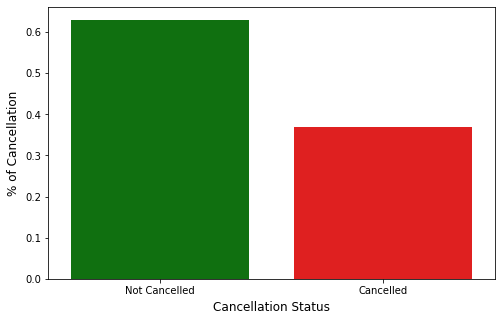

In [23]:
# Visualizing the percentage of canceled vs not canceled bookings: 
plt.figure(figsize=(8,5)) 
sns.barplot(x=HotelDf['is_canceled'].unique(), y=HotelDf['is_canceled'].value_counts(normalize=True), palette=['green', 'red'])
plt.xlabel("Cancellation Status", fontsize = 12, labelpad = 5)
plt.ylabel("% of Cancellation", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Cancelled', 'Cancelled']);

* **The rate of cancellation is likely matching with the industry standard which is around 37% - 40%** 
    * **Source:** [Emerchantpay Link](https://www.emerchantpay.com/infographic-how-can-hotels-combat-rising-cancellation-rates/)

* ** The problem that hospitality industies are facing that there are almost 4 cancellation in every 10 bookings** 

* ** The target data is  almost balance, so later on for the machine learning process we wont need to do an imbalance handing**

In [24]:
#!pip install tabulate

In [25]:
def unq_count_new(df,var,top_val,tit,dpn):
    #var='meal'

    if(top_val == 0):
        perclass = pd.DataFrame(df[var].value_counts(normalize=True,dropna=dpn))
        tardisval = pd.DataFrame(df[var].value_counts(dropna=dpn))
    else:
        perclass = pd.DataFrame(df[var].value_counts(normalize=True,dropna=dpn)[df[var].value_counts(dropna=dpn)>top_val])
        tardisval = pd.DataFrame(df[var].value_counts(dropna=dpn)[df[var].value_counts(dropna=dpn)>top_val])
        
    disdf = pd.concat([tardisval,round(perclass*100,3)],axis=1)
    disdf.reset_index()
    disdf.columns=['Count','Percent']

    str1 = f'**** Unique value distribution of {tit.title()} ******'

    width = len(str1)
    filler = '*'

    print(str1)
    print(f'{"*" :{filler}>{width}}\n')

    print(tabulate.tabulate(disdf, tablefmt='fancy_grid',headers=[tit.title(),'Count','Percent']))
    #return (disdf)

In [26]:
def count_plot(df,tit,var,tt,w,h):
    plt.figure(figsize=(w,h)) 
    plt.title("Count of " + tit, fontsize = 20, pad = 10)
    sns.countplot(x=df[var])
    plt.xlabel(tit, fontsize = 12, labelpad = 5)
    plt.ylabel("Count of "+tt, fontsize = 12, labelpad = 5)

## Hotel Type

In [27]:
unq_count_new(HotelDf,'hotel',0,'Hotel Type',False)

**** Unique value distribution of Hotel Type ******
***************************************************

╒══════════════╤═════════╤═══════════╕
│ Hotel Type   │   Count │   Percent │
╞══════════════╪═════════╪═══════════╡
│ type_1       │   79330 │    66.446 │
├──────────────┼─────────┼───────────┤
│ type_2       │   40060 │    33.554 │
╘══════════════╧═════════╧═══════════╛


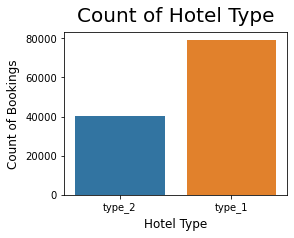

In [28]:
count_plot(HotelDf,'Hotel Type','hotel','Bookings',4,3)

* ** There are more booking from the `type1` hotel booking compared to the `type2` hotel booking in this case we will see it later on how this affect cancellation**

### Customer Type

In [29]:
unq_count_new(HotelDf,'customer_type',0,'Customer Type',False)

**** Unique value distribution of Customer Type ******
******************************************************

╒═════════════════╤═════════╤═══════════╕
│ Customer Type   │   Count │   Percent │
╞═════════════════╪═════════╪═══════════╡
│ Transient       │   89613 │    75.059 │
├─────────────────┼─────────┼───────────┤
│ Transient-Party │   25124 │    21.044 │
├─────────────────┼─────────┼───────────┤
│ Contract        │    4076 │     3.414 │
├─────────────────┼─────────┼───────────┤
│ Group           │     577 │     0.483 │
╘═════════════════╧═════════╧═══════════╛


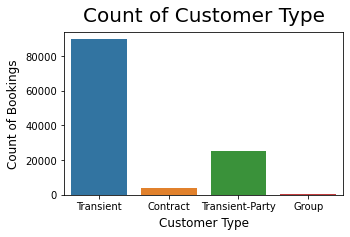

In [30]:
 count_plot(HotelDf,'Customer Type','customer_type','Bookings',5,3)

* **The customers in type `Transient`(Individual booking /Personal not related to company or anything) have majority of the booking and we will see how this customer type affecting the cancellation rate as well**

### Meal Type

In [31]:
unq_count_new(HotelDf,'meal',0,'Meal_Type',False)

**** Unique value distribution of Meal_Type ******
**************************************************

╒═══════════════════════════╤═════════╤═══════════╕
│ Meal_Type                 │   Count │   Percent │
╞═══════════════════════════╪═════════╪═══════════╡
│ Only Breakfast            │   92310 │    77.318 │
├───────────────────────────┼─────────┼───────────┤
│ Breakfast & dinner        │   14463 │    12.114 │
├───────────────────────────┼─────────┼───────────┤
│ No meal                   │   11819 │     9.899 │
├───────────────────────────┼─────────┼───────────┤
│ Breakfast, lunch & dinner │     798 │     0.668 │
╘═══════════════════════════╧═════════╧═══════════╛


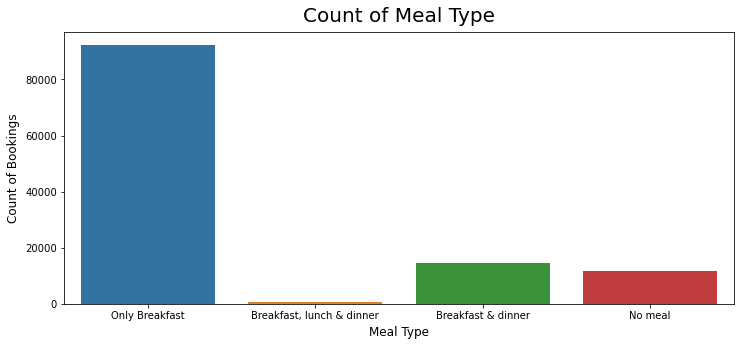

In [32]:
 count_plot(HotelDf,'Meal Type','meal','Bookings',12,5)

* ** Only Breakfast is most popular meal package compared to the others while Breakfast, lunch and dinner is the least popular meal package**
* ** Since Only Breakfast is most popular so majority of the customers stays for the day**

**Distribution Channel**

In [33]:
unq_count_new(HotelDf,'distribution_channel',0,'Distribution Channel',True)

**** Unique value distribution of Distribution Channel ******
*************************************************************

╒════════════════════════╤═════════╤═══════════╕
│ Distribution Channel   │   Count │   Percent │
╞════════════════════════╪═════════╪═══════════╡
│ TA/TO                  │   97870 │    81.975 │
├────────────────────────┼─────────┼───────────┤
│ Direct                 │   14645 │    12.267 │
├────────────────────────┼─────────┼───────────┤
│ Corporate              │    6677 │     5.593 │
├────────────────────────┼─────────┼───────────┤
│ GDS                    │     193 │     0.162 │
├────────────────────────┼─────────┼───────────┤
│ Undefined              │       5 │     0.004 │
╘════════════════════════╧═════════╧═══════════╛


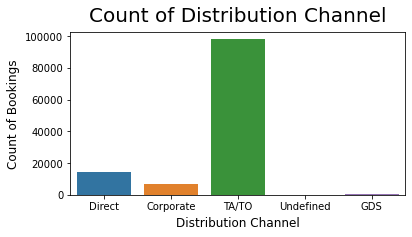

In [34]:
 count_plot(HotelDf,'Distribution Channel','distribution_channel','Bookings',6,3)

* **The `TA/TO` (Travel Agents / Tour Operators) are the biggest booking channel compared to other channels**
* **The `Undefined` data needs to treated with most occuence value as `TA/TO`**

### Market Segment

In [35]:
unq_count_new(HotelDf,'market_segment',0,'Market Segment',False)

**** Unique value distribution of Market Segment ******
*******************************************************

╒═════════════════════════════════╤═════════╤═══════════╕
│ Market Segment                  │   Count │   Percent │
╞═════════════════════════════════╪═════════╪═══════════╡
│ Online Travel Agents            │   56477 │    47.305 │
├─────────────────────────────────┼─────────┼───────────┤
│ Offline Travel Agents/Operators │   24219 │    20.286 │
├─────────────────────────────────┼─────────┼───────────┤
│ Groups                          │   19811 │    16.594 │
├─────────────────────────────────┼─────────┼───────────┤
│ Direct                          │   12606 │    10.559 │
├─────────────────────────────────┼─────────┼───────────┤
│ Corporate                       │    5295 │     4.435 │
├─────────────────────────────────┼─────────┼───────────┤
│ Complementary                   │     743 │     0.622 │
├─────────────────────────────────┼─────────┼───────────┤
│ Aviation       

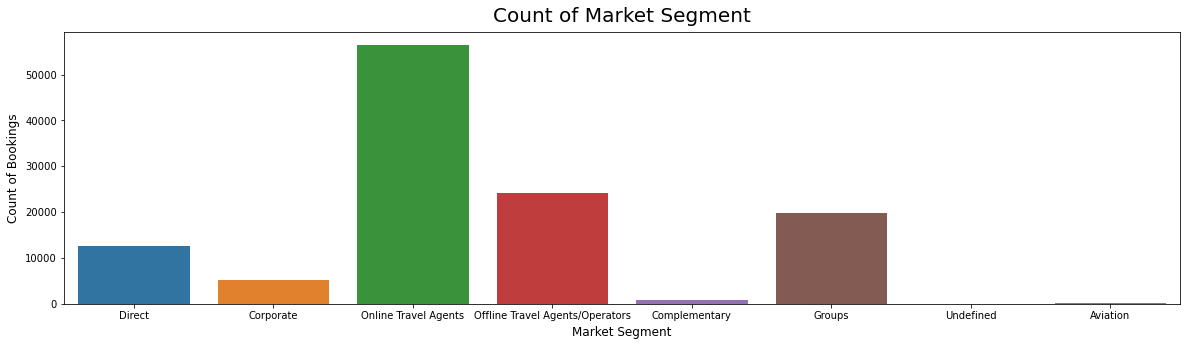

In [36]:
 count_plot(HotelDf,'Market Segment','market_segment','Bookings',20,5)

* ** The `Market Segment` also most similar to `Distribution Channel` but there some addtional categories also included**
* ** The OTA(`Online Travel Agents`) are the most contributed on the booking**
* ** There are 2 values as `Undefined` can be replaced with OTA as no point of keeping the value as `Undefined`**

### Country

In [37]:
unq_count_new(HotelDf,'c_name',2200,'Country',False) # Top 10 Countries

**** Unique value distribution of Country ******
************************************************

╒════════════════╤═════════╤═══════════╕
│ Country        │   Count │   Percent │
╞════════════════╪═════════╪═══════════╡
│ Portugal       │   48590 │    40.699 │
├────────────────┼─────────┼───────────┤
│ United Kingdom │   12129 │    10.159 │
├────────────────┼─────────┼───────────┤
│ France         │   10415 │     8.724 │
├────────────────┼─────────┼───────────┤
│ Spain          │    8568 │     7.176 │
├────────────────┼─────────┼───────────┤
│ Germany        │    7287 │     6.104 │
├────────────────┼─────────┼───────────┤
│ Italy          │    3766 │     3.154 │
├────────────────┼─────────┼───────────┤
│ Ireland        │    3375 │     2.827 │
├────────────────┼─────────┼───────────┤
│ Belgium        │    2342 │     1.962 │
├────────────────┼─────────┼───────────┤
│ China          │    2278 │     1.908 │
├────────────────┼─────────┼───────────┤
│ Brazil         │    2224 │     1.863 │

* **Almost half of the booking is made from `Portugal`**
* **There are many unique values from all the countries where the booking comes from, let's try to group it into continent or we will group it into booking from `Portugal` and booking from outside `Portugal` we may assume that both hotel types are in `Portugal` itself as local booking have a highest count.**
* ** So the new variable we create by splitting the booking into International Booking or Local Booking** 

In [38]:
# Define a function to split the values
def Split_Values_By_Two(df,var,chk_val,tval,fval):
    if(df[var] == chk_val):
        return tval
    else:
        return fval

In [39]:
HotelDf['country_type'] = HotelDf.apply(Split_Values_By_Two,args=('country','PRT','Local','International'),axis=1)

In [40]:
unq_count_new(HotelDf,'country_type',2200,'Country Type',False)

**** Unique value distribution of Country Type ******
*****************************************************

╒════════════════╤═════════╤═══════════╕
│ Country Type   │   Count │   Percent │
╞════════════════╪═════════╪═══════════╡
│ International  │   70800 │    59.301 │
├────────────────┼─────────┼───────────┤
│ Local          │   48590 │    40.699 │
╘════════════════╧═════════╧═══════════╛


* **The new feature will be used in later analysis to see how `country` will affect the cancellation rate**

In [41]:
#Create the location column with grouping with Portugal or next maximum value and others
HotelDf['location']=HotelDf['c_name'].apply(lambda x : 'Portugal' if(x=='Portugal') else('Western Europe' if(x in('United Kingdom','France','Germany','Italy')) else 'Others'))

In [42]:
unq_count_new(HotelDf,'location',0,'Location',False) # Top 10 Countries

**** Unique value distribution of Location ******
*************************************************

╒════════════════╤═════════╤═══════════╕
│ Location       │   Count │   Percent │
╞════════════════╪═════════╪═══════════╡
│ Portugal       │   48590 │    40.699 │
├────────────────┼─────────┼───────────┤
│ Others         │   37203 │    31.161 │
├────────────────┼─────────┼───────────┤
│ Western Europe │   33597 │    28.141 │
╘════════════════╧═════════╧═══════════╛


### Repeated Guest

In [43]:
unq_count_new(HotelDf,'is_repeated_customer',0,'Repeated Customer',False)

**** Unique value distribution of Repeated Customer ******
**********************************************************

╒═════════════════════╤═════════╤═══════════╕
│   Repeated Customer │   Count │   Percent │
╞═════════════════════╪═════════╪═══════════╡
│                   0 │  115580 │    96.809 │
├─────────────────────┼─────────┼───────────┤
│                   1 │    3810 │     3.191 │
╘═════════════════════╧═════════╧═══════════╛


* **The `Repeated customers` are only 3.19% so there are very low rate of loyal customers**
* **The loyal customers are the most profitable then new customers, Below are some reasons**

    * **They are familiar with hotels offered services**
    * **Loyal guests usually spend more money at your hotel**
    
    * **The stay period for loyal guests is usually longer than that of new guests**
    * **Most probably they will brag to their friends about the hotel that amazing hotel that they keep going to every year**
    
Source: [Sabee Link](https://www.sabeeapp.com/blog/loyal-customers-vs-new-customers)


### Reserved Room Type

In [44]:
unq_count_new(HotelDf,'reserved_room_type',0,'Resvered Room Type',False)

**** Unique value distribution of Resvered Room Type ******
***********************************************************

╒══════════════════════╤═════════╤═══════════╕
│ Resvered Room Type   │   Count │   Percent │
╞══════════════════════╪═════════╪═══════════╡
│ A                    │   85994 │    72.028 │
├──────────────────────┼─────────┼───────────┤
│ D                    │   19201 │    16.083 │
├──────────────────────┼─────────┼───────────┤
│ E                    │    6535 │     5.474 │
├──────────────────────┼─────────┼───────────┤
│ F                    │    2897 │     2.427 │
├──────────────────────┼─────────┼───────────┤
│ G                    │    2094 │     1.754 │
├──────────────────────┼─────────┼───────────┤
│ B                    │    1118 │     0.936 │
├──────────────────────┼─────────┼───────────┤
│ C                    │     932 │     0.781 │
├──────────────────────┼─────────┼───────────┤
│ H                    │     601 │     0.503 │
├──────────────────────┼─────────

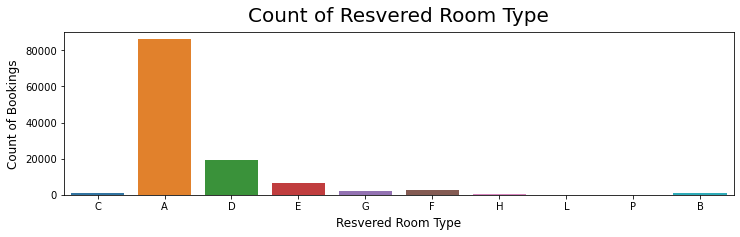

In [45]:
 count_plot(HotelDf,'Resvered Room Type','reserved_room_type','Bookings',12,3)

* ** The `Reversed Room Type` `A` is most popular room type since this has a highest number of booking**
* **The reason for this could be the cheepest room in the both hotel types, we may do later analysis to validate this assumtion**

### Assigned Room Type

In [46]:
unq_count_new(HotelDf,'assigned_room_type',0,'Assigned Room Type',False)

**** Unique value distribution of Assigned Room Type ******
***********************************************************

╒══════════════════════╤═════════╤═══════════╕
│ Assigned Room Type   │   Count │   Percent │
╞══════════════════════╪═════════╪═══════════╡
│ A                    │   74053 │    62.026 │
├──────────────────────┼─────────┼───────────┤
│ D                    │   25322 │    21.209 │
├──────────────────────┼─────────┼───────────┤
│ E                    │    7806 │     6.538 │
├──────────────────────┼─────────┼───────────┤
│ F                    │    3751 │     3.142 │
├──────────────────────┼─────────┼───────────┤
│ G                    │    2553 │     2.138 │
├──────────────────────┼─────────┼───────────┤
│ C                    │    2375 │     1.989 │
├──────────────────────┼─────────┼───────────┤
│ B                    │    2163 │     1.812 │
├──────────────────────┼─────────┼───────────┤
│ H                    │     712 │     0.596 │
├──────────────────────┼─────────

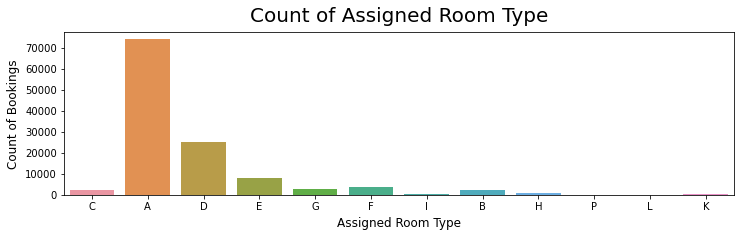

In [47]:
 count_plot(HotelDf,'Assigned Room Type','assigned_room_type','Bookings',12,3)

* **There are modarate difference from `Reversed Room Type` to `Assigned Room Type`**
* **The Room types(`I` & `K`) are not booked by customers but there are assignments in the dataset, these assigments may be due to the Reversed rooms are assigned to early arrived loyal customers vist on last minute**

### Deposit Type

In [48]:
unq_count_new(HotelDf,'deposit_type',0,'Deposit Type',False)

**** Unique value distribution of Deposit Type ******
*****************************************************

╒════════════════╤═════════╤═══════════╕
│ Deposit Type   │   Count │   Percent │
╞════════════════╪═════════╪═══════════╡
│ No Deposit     │  104641 │    87.646 │
├────────────────┼─────────┼───────────┤
│ Non Refund     │   14587 │    12.218 │
├────────────────┼─────────┼───────────┤
│ Refundable     │     162 │     0.136 │
╘════════════════╧═════════╧═══════════╛


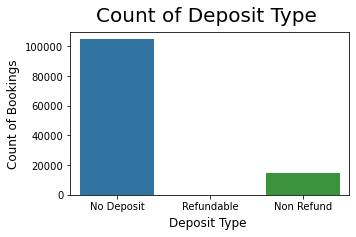

In [49]:
 count_plot(HotelDf,'Deposit Type ','deposit_type','Bookings',5,3)

* ** The `No Deposit` type is the highest count this deposit type may impact highly affect the cancellation rate in both type of hotels**

### Total Stays =  `Stays in Week Nights` +  `Stays in Weekend Nights`

In [50]:
HotelDf['total_stays'] = HotelDf['stays_in_week_nights'] + HotelDf['stays_in_weekend_nights']

In [51]:
unq_count_new(HotelDf,'total_stays',850,'Total Stays',False) # Top 10

**** Unique value distribution of Total Stays ******
****************************************************

╒═══════════════╤═════════╤═══════════╕
│   Total Stays │   Count │   Percent │
╞═══════════════╪═════════╪═══════════╡
│             2 │   27643 │    23.154 │
├───────────────┼─────────┼───────────┤
│             3 │   27076 │    22.679 │
├───────────────┼─────────┼───────────┤
│             1 │   21020 │    17.606 │
├───────────────┼─────────┼───────────┤
│             4 │   17383 │    14.56  │
├───────────────┼─────────┼───────────┤
│             7 │    8655 │     7.249 │
├───────────────┼─────────┼───────────┤
│             5 │    7784 │     6.52  │
├───────────────┼─────────┼───────────┤
│             6 │    3857 │     3.231 │
├───────────────┼─────────┼───────────┤
│             8 │    1161 │     0.972 │
├───────────────┼─────────┼───────────┤
│            10 │    1139 │     0.954 │
├───────────────┼─────────┼───────────┤
│            14 │     916 │     0.767 │
╘════════════

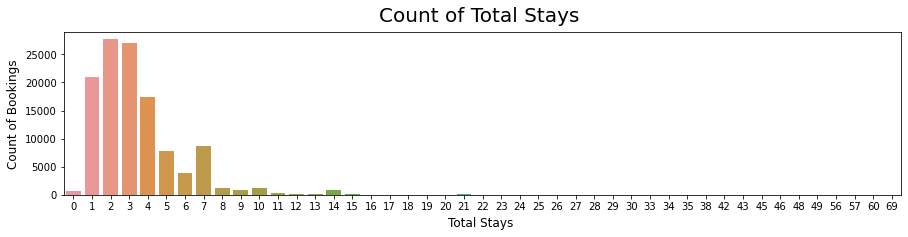

In [52]:
 count_plot(HotelDf,'Total Stays ','total_stays','Bookings',15,3)

* **Total Stays of `2`,`3`,`1` and `4` days are the most popular total stays**
* **There are customers to book hotel on the same day and check out (not an over night stay) so we will not be dropping the rows that has 0 total stays (not an overnight) stay**

### Total Guest =  `Adult Guest(>18 Years)` +  `Childerens(<18 Years` 

In [53]:
unq_count_new(HotelDf,'children',0,'Total Guests',False)

**** Unique value distribution of Total Guests ******
*****************************************************

╒════════════════╤═════════╤═══════════╕
│   Total Guests │   Count │   Percent │
╞════════════════╪═════════╪═══════════╡
│              0 │  110058 │    92.184 │
├────────────────┼─────────┼───────────┤
│              1 │    5446 │     4.562 │
├────────────────┼─────────┼───────────┤
│              2 │    3772 │     3.159 │
├────────────────┼─────────┼───────────┤
│              3 │     111 │     0.093 │
├────────────────┼─────────┼───────────┤
│             10 │       2 │     0.002 │
├────────────────┼─────────┼───────────┤
│              9 │       1 │     0.001 │
╘════════════════╧═════════╧═══════════╛


In [54]:
unq_count_new(HotelDf,'adults',0,'Total Guests',False)

**** Unique value distribution of Total Guests ******
*****************************************************

╒════════════════╤═════════╤═══════════╕
│   Total Guests │   Count │   Percent │
╞════════════════╪═════════╪═══════════╡
│              2 │   89680 │    75.115 │
├────────────────┼─────────┼───────────┤
│              1 │   23027 │    19.287 │
├────────────────┼─────────┼───────────┤
│              3 │    6202 │     5.195 │
├────────────────┼─────────┼───────────┤
│              0 │     403 │     0.338 │
├────────────────┼─────────┼───────────┤
│              4 │      62 │     0.052 │
├────────────────┼─────────┼───────────┤
│             26 │       5 │     0.004 │
├────────────────┼─────────┼───────────┤
│             27 │       2 │     0.002 │
├────────────────┼─────────┼───────────┤
│             20 │       2 │     0.002 │
├────────────────┼─────────┼───────────┤
│              5 │       2 │     0.002 │
├────────────────┼─────────┼───────────┤
│             40 │       1 │  

In [55]:
unq_count_new(HotelDf,'total_guest',0,'Total Guest',False)

**** Unique value distribution of Total Guest ******
****************************************************

╒═══════════════╤═════════╤═══════════╕
│   Total Guest │   Count │   Percent │
╞═══════════════╪═════════╪═══════════╡
│             2 │   82051 │    68.725 │
├───────────────┼─────────┼───────────┤
│             1 │   22581 │    18.914 │
├───────────────┼─────────┼───────────┤
│             3 │   10495 │     8.791 │
├───────────────┼─────────┼───────────┤
│             4 │    3929 │     3.291 │
├───────────────┼─────────┼───────────┤
│             0 │     180 │     0.151 │
├───────────────┼─────────┼───────────┤
│             5 │     137 │     0.115 │
├───────────────┼─────────┼───────────┤
│            26 │       5 │     0.004 │
├───────────────┼─────────┼───────────┤
│            12 │       2 │     0.002 │
├───────────────┼─────────┼───────────┤
│            27 │       2 │     0.002 │
├───────────────┼─────────┼───────────┤
│            20 │       2 │     0.002 │
├────────────

<AxesSubplot:xlabel='total_guest', ylabel='count'>

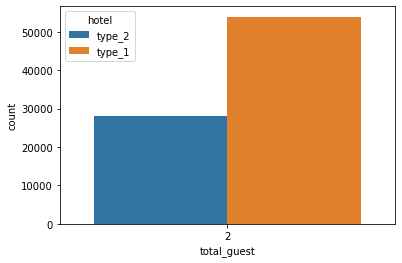

In [56]:
sns.countplot(data=HotelDf[HotelDf['total_guest']==2],x='total_guest',hue='hotel')

* **The `Total Guest` should not be as `0` this looks like missing data we can drop this values since this is only 0.15% of total data**
* **The highest count of `Total Guest` is `2` we assume that mostly couples stayed in `type1` hotel** 


### Booking Changes

In [57]:
unq_count_new(HotelDf,'booking_changes',120,'Booking Options Changed',False) # Top 10

**** Unique value distribution of Booking Options Changed ******
****************************************************************

╒═══════════════════════════╤═════════╤═══════════╕
│   Booking Options Changed │   Count │   Percent │
╞═══════════════════════════╪═════════╪═══════════╡
│                         0 │  101314 │    84.86  │
├───────────────────────────┼─────────┼───────────┤
│                         1 │   12701 │    10.638 │
├───────────────────────────┼─────────┼───────────┤
│                         2 │    3805 │     3.187 │
├───────────────────────────┼─────────┼───────────┤
│                         3 │     927 │     0.776 │
├───────────────────────────┼─────────┼───────────┤
│                         4 │     376 │     0.315 │
╘═══════════════════════════╧═════════╧═══════════╛


* **Almost 85% of the custmers are not changed their booking**
* **Considering the many diffent values in the booking changes we could make a two group as `Booking Changed` and `Booking Not Changed`**

In [58]:
HotelDf['booking_changes_new'] = HotelDf.apply(Split_Values_By_Two,args=('booking_changes',0,0,1),axis=1)

In [59]:
unq_count_new(HotelDf,'booking_changes_new',1,'Booking Options Changed',False)

**** Unique value distribution of Booking Options Changed ******
****************************************************************

╒═══════════════════════════╤═════════╤═══════════╕
│   Booking Options Changed │   Count │   Percent │
╞═══════════════════════════╪═════════╪═══════════╡
│                         0 │  101314 │     84.86 │
├───────────────────────────┼─────────┼───────────┤
│                         1 │   18076 │     15.14 │
╘═══════════════════════════╧═════════╧═══════════╛


### Days In Waiting List

In [60]:
# Days in waiting with capping of count more than 150 
unq_count_new(HotelDf,'days_in_waiting_list',150,'Days in Waiting List',False)

**** Unique value distribution of Days In Waiting List ******
*************************************************************

╒════════════════════════╤═════════╤═══════════╕
│   Days In Waiting List │   Count │   Percent │
╞════════════════════════╪═════════╪═══════════╡
│                      0 │  115692 │    96.903 │
├────────────────────────┼─────────┼───────────┤
│                     39 │     227 │     0.19  │
├────────────────────────┼─────────┼───────────┤
│                     58 │     164 │     0.137 │
╘════════════════════════╧═════════╧═══════════╛


* **Almost 97% customers are got the rooms without any waiting list**
* **The cause of the waiting list could be the reason the customer booking at the wrong time(Last minute travel) during days in high occupency(Important Country festivals)**
* **This can be avoided book the rooms 40 days before**
    * Source:[USAToday](https://www.usatoday.com/story/travel/hotels/2014/08/14/hotel-booking-tips/14006883/)

### Required Car Parking

In [61]:
unq_count_new(HotelDf,'required_car_parking_spaces',0,'# of Car Parking Required',False)

**** Unique value distribution of # Of Car Parking Required ******
******************************************************************

╒═════════════════════════════╤═════════╤═══════════╕
│   # Of Car Parking Required │   Count │   Percent │
╞═════════════════════════════╪═════════╪═══════════╡
│                           0 │  111974 │    93.788 │
├─────────────────────────────┼─────────┼───────────┤
│                           1 │    7383 │     6.184 │
├─────────────────────────────┼─────────┼───────────┤
│                           2 │      28 │     0.023 │
├─────────────────────────────┼─────────┼───────────┤
│                           3 │       3 │     0.003 │
├─────────────────────────────┼─────────┼───────────┤
│                           8 │       2 │     0.002 │
╘═════════════════════════════╧═════════╧═══════════╛


* **Over `94%` customer not requested for the car parking**
* **There is `6%` of customer required 1 car parking**
* **We need to do further analysis on the effect of the cancellation rate**

### Required Spcecial Request

In [62]:
unq_count_new(HotelDf,'totalno_of_special_requests',0,'# of Special Request Required',False)

**** Unique value distribution of # Of Special Request Required ******
**********************************************************************

╒═════════════════════════════════╤═════════╤═══════════╕
│   # Of Special Request Required │   Count │   Percent │
╞═════════════════════════════════╪═════════╪═══════════╡
│                               0 │   70318 │    58.898 │
├─────────────────────────────────┼─────────┼───────────┤
│                               1 │   33226 │    27.83  │
├─────────────────────────────────┼─────────┼───────────┤
│                               2 │   12969 │    10.863 │
├─────────────────────────────────┼─────────┼───────────┤
│                               3 │    2497 │     2.091 │
├─────────────────────────────────┼─────────┼───────────┤
│                               4 │     340 │     0.285 │
├─────────────────────────────────┼─────────┼───────────┤
│                               5 │      40 │     0.034 │
╘═════════════════════════════════╧═════════╧

* **Almost `59%` of customers not requested for special request**
* **Over `28%` customers are requested for `1` special request and `11%` customers are requested for `2` special request**

### Lead Time Days = (`Date of Arrival` - `Date of Booking`)

**There are many unique values in the lead time and we can group it as months to get more insights on the trend**

**Lead Time Months = ((`leadtime days`) // `30`) (// Returns Rounding off value)**


In [63]:
HotelDf['leadtime_month'] = HotelDf['leadtime'] // 30

In [64]:
unq_count_new(HotelDf,'leadtime_month',8000,'Lead Time',False) # Top 5 values

**** Unique value distribution of Lead Time ******
**************************************************

╒═════════════╤═════════╤═══════════╕
│   Lead Time │   Count │   Percent │
╞═════════════╪═════════╪═══════════╡
│           0 │   38047 │    31.868 │
├─────────────┼─────────┼───────────┤
│           1 │   17193 │    14.401 │
├─────────────┼─────────┼───────────┤
│           2 │   12726 │    10.659 │
├─────────────┼─────────┼───────────┤
│           3 │   10475 │     8.774 │
├─────────────┼─────────┼───────────┤
│           4 │    8074 │     6.763 │
╘═════════════╧═════════╧═══════════╛


* **The majority of leadtime booking and arriaval on the same month and some bookings made a year or more ahead before the arrival**
* **We need to check this longer values how affect the cancellation rate**

### Arrival Month

In [65]:
unq_count_new(HotelDf,'a_month',0,'Arrival Month',False) 

**** Unique value distribution of Arrival Month ******
******************************************************

╒═════════════════╤═════════╤═══════════╕
│ Arrival Month   │   Count │   Percent │
╞═════════════════╪═════════╪═══════════╡
│ August          │   13877 │    11.623 │
├─────────────────┼─────────┼───────────┤
│ July            │   12661 │    10.605 │
├─────────────────┼─────────┼───────────┤
│ May             │   11791 │     9.876 │
├─────────────────┼─────────┼───────────┤
│ October         │   11160 │     9.348 │
├─────────────────┼─────────┼───────────┤
│ April           │   11089 │     9.288 │
├─────────────────┼─────────┼───────────┤
│ June            │   10939 │     9.162 │
├─────────────────┼─────────┼───────────┤
│ September       │   10508 │     8.801 │
├─────────────────┼─────────┼───────────┤
│ March           │    9890 │     8.284 │
├─────────────────┼─────────┼───────────┤
│ February        │    7972 │     6.677 │
├─────────────────┼─────────┼───────────┤
│ Novem

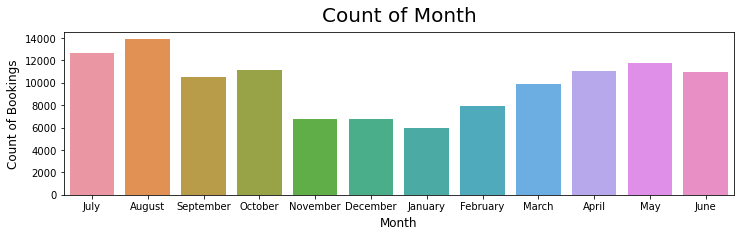

In [66]:
 count_plot(HotelDf,'Month','a_month','Bookings',12,3)

* **July and Auguest(3 times of data) higher count since the data provided from July 2018 to Auguest 2020**
* **The average shown in the above table is not reliable since there are difference in months over the year**

### Arrival Day

In [67]:
unq_count_new(HotelDf,'a_day_of_week',0,'Arrival Month',False) 

**** Unique value distribution of Arrival Month ******
******************************************************

╒═════════════════╤═════════╤═══════════╕
│ Arrival Month   │   Count │   Percent │
╞═════════════════╪═════════╪═══════════╡
│ Monday          │   18908 │    15.837 │
├─────────────────┼─────────┼───────────┤
│ Sunday          │   18517 │    15.51  │
├─────────────────┼─────────┼───────────┤
│ Tuesday         │   17996 │    15.073 │
├─────────────────┼─────────┼───────────┤
│ Wednesday       │   17213 │    14.417 │
├─────────────────┼─────────┼───────────┤
│ Thursday        │   16170 │    13.544 │
├─────────────────┼─────────┼───────────┤
│ Friday          │   16084 │    13.472 │
├─────────────────┼─────────┼───────────┤
│ Saturday        │   14502 │    12.147 │
╘═════════════════╧═════════╧═══════════╛


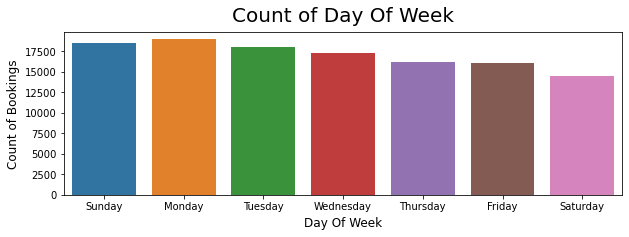

In [68]:
 count_plot(HotelDf,'Day Of Week','a_day_of_week','Bookings',10,3)

* **Booking Arrival on Monday and Sunday is higher than other days**
* **Also average difference in days of arrival is `2%` to `3%`**

### Previous Cancellation

In [69]:
unq_count_new(HotelDf,'previous_cancellations',0,'Previous Cancellation',False) 

**** Unique value distribution of Previous Cancellation ******
**************************************************************

╒═════════════════════════╤═════════╤═══════════╕
│   Previous Cancellation │   Count │   Percent │
╞═════════════════════════╪═════════╪═══════════╡
│                       0 │  112906 │    94.569 │
├─────────────────────────┼─────────┼───────────┤
│                       1 │    6051 │     5.068 │
├─────────────────────────┼─────────┼───────────┤
│                       2 │     116 │     0.097 │
├─────────────────────────┼─────────┼───────────┤
│                       3 │      65 │     0.054 │
├─────────────────────────┼─────────┼───────────┤
│                      24 │      48 │     0.04  │
├─────────────────────────┼─────────┼───────────┤
│                      11 │      35 │     0.029 │
├─────────────────────────┼─────────┼───────────┤
│                       4 │      31 │     0.026 │
├─────────────────────────┼─────────┼───────────┤
│                      

In [70]:
HotelDf['previous_cancellations_new'] = HotelDf.apply(Split_Values_By_Two,args=('previous_cancellations',0,'No','Yes'),axis=1)

In [71]:
unq_count_new(HotelDf,'previous_cancellations_new',0,'Previous Cancellation',False) 

**** Unique value distribution of Previous Cancellation ******
**************************************************************

╒═════════════════════════╤═════════╤═══════════╕
│ Previous Cancellation   │   Count │   Percent │
╞═════════════════════════╪═════════╪═══════════╡
│ No                      │  112906 │    94.569 │
├─────────────────────────┼─────────┼───────────┤
│ Yes                     │    6484 │     5.431 │
╘═════════════════════════╧═════════╧═══════════╛


* **Almost 95% of the booking never been canceled before in this data set.**
* **we will group this into booking that's never been canceled or have been canceled before**

In [72]:
unq_count_new(HotelDf,'previous_bookings_not_canceled',0,'No Previous Cancellation',False) 

**** Unique value distribution of No Previous Cancellation ******
*****************************************************************

╒════════════════════════════╤═════════╤═══════════╕
│   No Previous Cancellation │   Count │   Percent │
╞════════════════════════════╪═════════╪═══════════╡
│                          0 │  115770 │    96.968 │
├────────────────────────────┼─────────┼───────────┤
│                          1 │    1542 │     1.292 │
├────────────────────────────┼─────────┼───────────┤
│                          2 │     580 │     0.486 │
├────────────────────────────┼─────────┼───────────┤
│                          3 │     333 │     0.279 │
├────────────────────────────┼─────────┼───────────┤
│                          4 │     229 │     0.192 │
├────────────────────────────┼─────────┼───────────┤
│                          5 │     181 │     0.152 │
├────────────────────────────┼─────────┼───────────┤
│                          6 │     115 │     0.096 │
├──────────────────

In [73]:
HotelDf['previous_bookings_not_canceled_new'] = HotelDf.apply(Split_Values_By_Two,args=('previous_bookings_not_canceled',0,'No','Yes'),axis=1)

In [74]:
unq_count_new(HotelDf,'previous_bookings_not_canceled_new',0,'No Previous Cancellation',False) 

**** Unique value distribution of No Previous Cancellation ******
*****************************************************************

╒════════════════════════════╤═════════╤═══════════╕
│ No Previous Cancellation   │   Count │   Percent │
╞════════════════════════════╪═════════╪═══════════╡
│ No                         │  115770 │    96.968 │
├────────────────────────────┼─────────┼───────────┤
│ Yes                        │    3620 │     3.032 │
╘════════════════════════════╧═════════╧═══════════╛


In [75]:
HotelDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 40 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   hotel                               119390 non-null  object        
 1   is_canceled                         119390 non-null  int64         
 2   booking_date                        119390 non-null  datetime64[ns]
 3   arrival_date                        119390 non-null  datetime64[ns]
 4   stays_in_weekend_nights             119390 non-null  int64         
 5   stays_in_week_nights                119390 non-null  int64         
 6   adults                              119390 non-null  int64         
 7   children                            119390 non-null  int64         
 8   meal                                119390 non-null  object        
 9   country                             118902 non-null  object        
 10  market_s

In [76]:
HotelDf['is_repeated_customer'] = HotelDf['is_repeated_customer'].astype('object')
HotelDf['agent'] = HotelDf['agent'].astype('object')
HotelDf['company'] = HotelDf['company'].astype('object')
HotelDf['a_year'] = HotelDf['a_year'].astype('object')
HotelDf['a_day'] = HotelDf['a_day'].astype('object')
HotelDf['a_weekno'] = HotelDf['a_weekno'].astype('object')

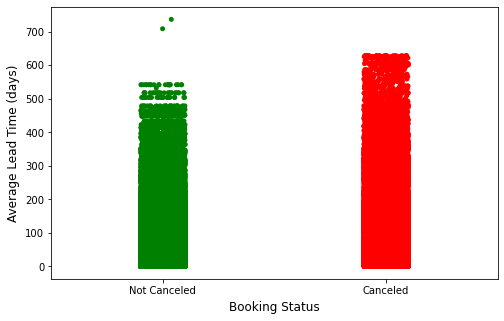

In [77]:
plt.figure(figsize=(8,5)) 
sns.stripplot(x=HotelDf['is_canceled'], y=HotelDf['leadtime'], palette=['green', 'red'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

* **Canceled bookings have a longer lead time on average.**
* **There are 2 bookings not Canceled with higher lead time these bookings could by the loyal customners**

In [78]:
# The below two bookings made for highest leadtime and booking is not canceled
HotelDf.sort_values(by='leadtime',ascending=False).head(2)

,hotel,is_canceled,booking_date,arrival_date,stays_in_weekend_nights,stays_in_week_nights,adults,children,meal,country,market_segment,distribution_channel,is_repeated_customer,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,totalno_of_special_requests,total_guest,a_year,a_month,a_day,a_day_of_week,a_weekno,leadtime,c_name,country_type,location,total_stays,booking_changes_new,leadtime_month,previous_cancellations_new,previous_bookings_not_canceled_new
1,type_2,0,2016-06-24,2018-07-01,0,0,2,0,Only Breakfast,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0,0,2,2018,July,1,Sunday,26,737,Portugal,Local,Portugal,0,1,24,No,No
4182,type_2,0,2017-03-18,2019-02-25,8,20,2,0,Breakfast & dinner,GBR,Direct,Direct,0,0,0,E,E,2,No Deposit,NaN,NaN,0,Transient,0,0,2,2019,February,25,Monday,9,709,United Kingdom,International,Western Europe,28,1,23,No,No


### Remove data point which not relavant for the analysis

In [79]:
HotelDf = HotelDf[HotelDf['adults']!=0]

### Missing Value Treatment

In [80]:
HotelDf['country'].fillna(HotelDf['country'].mode()[0],inplace=True)

In [81]:
HotelDf['agent'].fillna('No Agent',inplace=True)

In [82]:
HotelDf['company'].fillna('No Company',inplace=True)

In [83]:
HotelDf['book_via_company']=HotelDf.apply(Split_Values_By_Two,args=('company','No Company','Booking Not Via Company','Booking Via Company'),axis=1)

### Outlier Treatment

* Let's check the outliers for the variables.

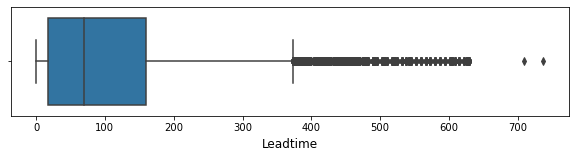

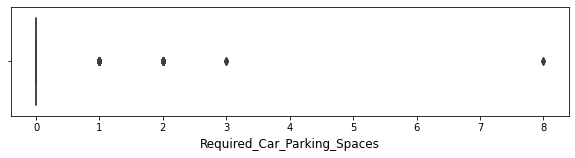

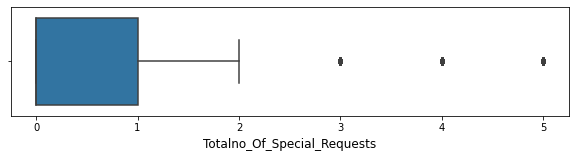

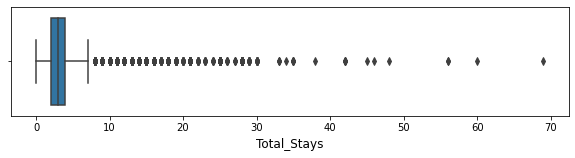

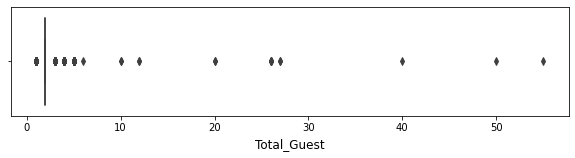

In [84]:
coloutcheck = ['leadtime','required_car_parking_spaces','totalno_of_special_requests','total_stays','total_guest']
for i in coloutcheck:
    plt.figure(figsize=(10,2)) 
    sns.boxplot(data=HotelDf,x=HotelDf[i]) #,x='is_canceled')
    plt.xlabel(i.title(), fontsize = 12, labelpad = 5)
    #plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);
#HotelDf[['leadtime','required_car_parking_spaces','totalno_of_special_requests','days_in_waiting_list','total_stays','total_guest']].boxplot(vert=False)

* There are outliers present in all the variables.
* The variables "Totalno_Special_Request" and "Required_Car_Parking_Spaces" are having less frequency so we can skip for the outlier treatment.
* The variable "Lead time","Total_Stays","Total_Guest"  will be treated the outliers

In [85]:
#Define the function to identify the outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [86]:
colout = ['leadtime','totalno_of_special_requests','total_stays']
for column in colout:
    lr,ur=remove_outlier(HotelDf[column])
    HotelDf[column]=np.where(HotelDf[column]>ur,ur,HotelDf[column])
    HotelDf[column]=np.where(HotelDf[column]>ur,ur,HotelDf[column])

In [87]:
HotelDf['total_guest'] = HotelDf['total_guest'].apply(lambda x: 3 if(x>=3) else x)

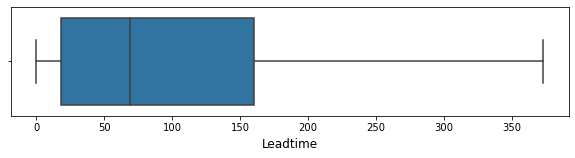

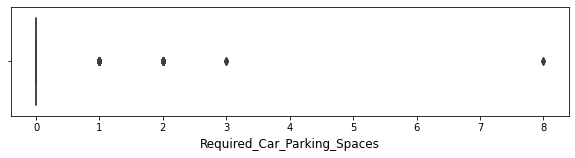

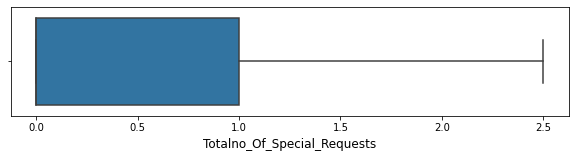

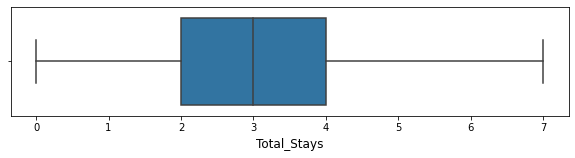

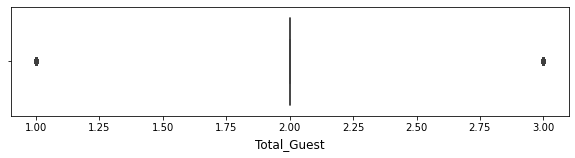

In [88]:
coloutcheck = ['leadtime','required_car_parking_spaces','totalno_of_special_requests','total_stays','total_guest']
for i in coloutcheck:
    plt.figure(figsize=(10,2)) 
    sns.boxplot(data=HotelDf,x=HotelDf[i]) #,x='is_canceled')
    plt.xlabel(i.title(), fontsize = 12, labelpad = 5)
    #plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);
#HotelDf[['leadtime','required_car_parking_spaces','totalno_of_special_requests','days_in_waiting_list','total_stays','total_guest']].boxplot(vert=False)

**b) Bivariate analysis (relationship between different variables , correlations)**
### Bivariate analysis

In [89]:
#Bivariant Analysis with Target comparison for Catagorical features
def bivarwithtarget(tar,var,target_yes,target_no,var_head,df_table,w,h,head):
    cc=df_table[tar].replace(0,target_no).replace(1,target_yes)
    df=pd.crosstab(df_table[var], cc).reset_index()
    dfp=round(pd.crosstab(df_table[var], cc,normalize='index').reset_index(),4).reset_index() 
    dfp[target_yes] = round(dfp[target_yes] * 100,2)
    dfp[target_no] = round(dfp[target_no] * 100,2)
    ftp=pd.concat([df,dfp],axis=1)
    ftp= ftp.T.drop_duplicates().T.reset_index(drop=True)
    str1 = f'**** Bivarient analysis for {var.title()} on the Target Variable({tar.title()}) ******'

    width = len(str1)
    filler = '*'

    print(str1)
    print(f'{"*" :{filler}>{width}}\n')    
    print(tabulate.tabulate(ftp[[var,target_yes,target_no]],tablefmt='fancy_grid',headers=['Index',var_head,target_yes +' - Count',target_yes +' - %',target_no + ' - Count',target_no + '- %']))


    plt.figure(figsize=(w,h)) 
    sns.barplot(x=df_table[var], y=df_table[tar], palette='Blues')
    plt.xlabel(var_head, fontsize = 12, labelpad = 5)
    plt.ylabel("Average of " + head, fontsize = 12, labelpad = 5);
    #plt.legend([target_yes,target_no]);

### Hotel Type and Target Variable

**** Bivarient analysis for Hotel on the Target Variable(Is_Canceled) ******
****************************************************************************

╒═════════╤══════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Hotel Type   │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪══════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ type_1       │              32995 │          41.8  │                  45945 │             58.2  │
├─────────┼──────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ type_2       │              11120 │          27.77 │                  28927 │             72.23 │
╘═════════╧══════════════╧════════════════════╧════════════════╧════════════════════════╧═══════════════════╛


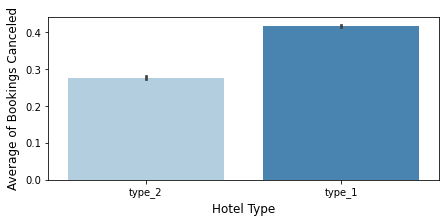

In [90]:
#unq_count_new(HotelDf,'hotel',0,'Hotel Type',False) 
bivarwithtarget('is_canceled','hotel','Canceled','Not Canceled','Hotel Type',HotelDf,7,3,'Bookings Canceled')

* **The `type1` hotels has a canceling rate then `type2`. Based on the dataset the `type1` more records so this may be cause of this**
* **One assumtion can be made that increase number of booking will increase number of cancellation (Postively Correlated)**

### Arrival Year and Target Variable

**** Bivarient analysis for A_Year on the Target Variable(Is_Canceled) ******
*****************************************************************************

╒═════════╤════════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │   Arrival Year │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪════════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │           2018 │               8136 │          37.06 │                  13816 │             62.94 │
├─────────┼────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │           2019 │              20276 │          35.9  │                  36202 │             64.1  │
├─────────┼────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       2 │           2020 │              15703 │          

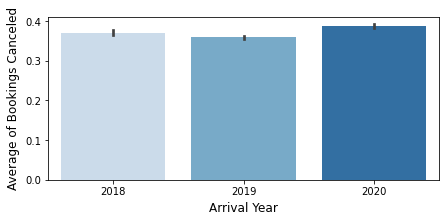

In [91]:
#unq_count_new(HotelDf,'a_year',0,'Arrival Year',False) 
bivarwithtarget('is_canceled','a_year','Canceled','Not Canceled','Arrival Year',HotelDf,7,3,'Bookings Canceled')

* **The cancellation rate goes down about 1.2% from in 2019 however the cancellation rate goes up 2.84 % in 2020 to 38.7%**

* **The Years 2018 and 2020 only have the half of the year so this result may not represent the actual cancelation for both 2018 and 2020**

### Arrival Month and Target Variable

**** Bivarient analysis for A_Month on the Target Variable(Is_Canceled) ******
******************************************************************************

╒═════════╤═════════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Arrival Month   │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪═════════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ April           │               4510 │          40.79 │                   6547 │             59.21 │
├─────────┼─────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ August          │               5226 │          37.79 │                   8603 │             62.21 │
├─────────┼─────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       2 │ December        │               2359 │

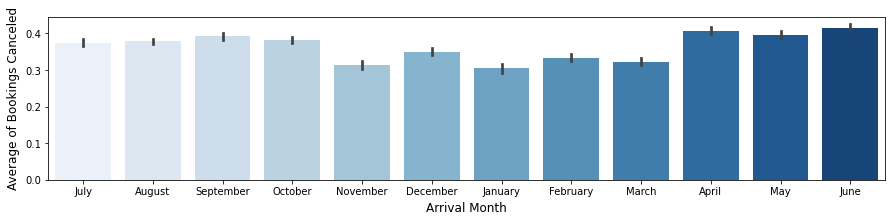

In [92]:
#unq_count_new(HotelDf,'a_month',0,'Arrival Year',False) 
bivarwithtarget('is_canceled','a_month','Canceled','Not Canceled','Arrival Month',HotelDf,15,3,'Bookings Canceled')

* **There are fluctuation in the term of arrival month and cancellation with the highest cancellation month are in**
    * June (41.6 %)
    * April (40.8 %)
    * May (39.6 %)

**** Bivarient analysis for Total_Guest on the Target Variable(Is_Canceled) ******
**********************************************************************************

╒═════════╤═══════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │   Total Guest │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪═══════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │             1 │               6555 │          29.03 │                  16022 │             70.97 │
├─────────┼───────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │             2 │              32492 │          39.7  │                  49354 │             60.3  │
├─────────┼───────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       2 │             3 │               5068 │        

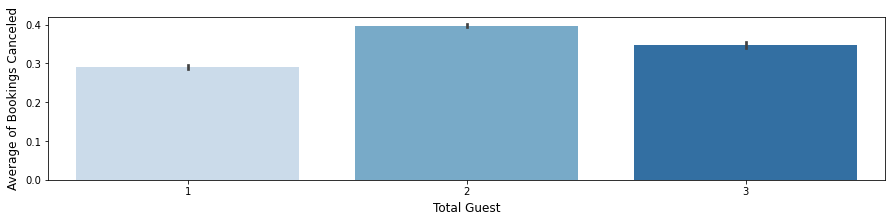

In [93]:
bivarwithtarget('is_canceled','total_guest','Canceled','Not Canceled','Total Guest',HotelDf,15,3,'Bookings Canceled')

* **Since we already reviwed this on the univarient the more of cancellations are with the stay of `2` persons**
* **The `Total Guest` with more than or equal to `20` then all bookings are cancelled**
* **The `Total Guest` with 50% canceled for the count `10` and `12`**

### Meal Type and Cancellation

**** Bivarient analysis for Meal on the Target Variable(Is_Canceled) ******
***************************************************************************

╒═════════╤═══════════════════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Meal Type                 │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪═══════════════════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ Breakfast & dinner        │               4983 │          34.47 │                   9471 │             65.53 │
├─────────┼───────────────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ Breakfast, lunch & dinner │                478 │          59.9  │                    320 │             40.1  │
├─────────┼───────────────────────────┼────────────────────┼────────────────┼────────────────────────┼───────

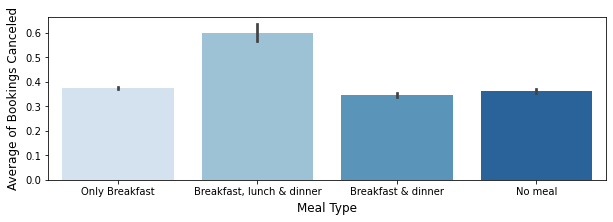

In [94]:
bivarwithtarget('is_canceled','meal','Canceled','Not Canceled','Meal Type',HotelDf,10,3,'Bookings Canceled')

* **Booking with `Breakfast, Lunch & Dinner` are more likely to cancel compared to booking with other meal package**
* **While other meal packages has cancellation around `34 - 37`%**

### Location and Cancellation
#### Here we are using the country_type catagorized as `Local` bookings from `Porugal` and `International`

**** Bivarient analysis for Country_Type on the Target Variable(Is_Canceled) ******
***********************************************************************************

╒═════════╤═══════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Location      │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪═══════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ International │              16621 │          23.56 │                  53926 │             76.44 │
├─────────┼───────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ Local         │              27494 │          56.76 │                  20946 │             43.24 │
╘═════════╧═══════════════╧════════════════════╧════════════════╧════════════════════════╧═══════════════════╛


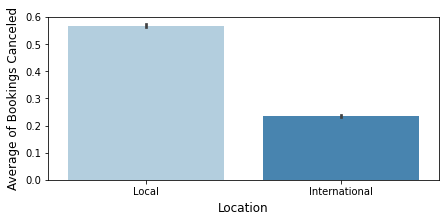

In [95]:
bivarwithtarget('is_canceled','country_type','Canceled','Not Canceled','Location',HotelDf,7,3,'Bookings Canceled')

* **The booking made in `Portugal` are almost 2.5 X more likely to be cancelled compared to booking that's made outside portugal** 

### Market Segment and Distribuation Channel

**** Bivarient analysis for Market_Segment on the Target Variable(Is_Canceled) ******
*************************************************************************************

╒═════════╤═════════════════════════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Market Segment                  │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪═════════════════════════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ Aviation                        │                 52 │          22.13 │                    183 │             77.87 │
├─────────┼─────────────────────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ Complementary                   │                 88 │          12.15 │                    636 │             87.85 │
├─────────┼─────────────────────────────────┼────────

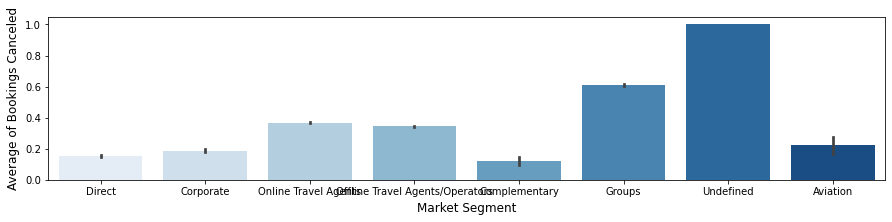

In [96]:
bivarwithtarget('is_canceled','market_segment','Canceled','Not Canceled','Market Segment',HotelDf,15,3,'Bookings Canceled')

* **The `Groups` market segment has a higher cancel rate(`61.06`) compared to it's confirmed rate**
* **The `Travel agent (online) and Offline` has almost a similar number in term of cancellation rate**
* **The lowest cancellation rate is `Direct Booking`**

**** Bivarient analysis for Distribution_Channel on the Target Variable(Is_Canceled) ******
*******************************************************************************************

╒═════════╤════════════════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Distribution Channel   │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪════════════════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ Corporate              │               1467 │          22.06 │                   5184 │             77.94 │
├─────────┼────────────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ Direct                 │               2547 │          17.47 │                  12031 │             82.53 │
├─────────┼────────────────────────┼────────────────────┼────────────────┼─────────────────────

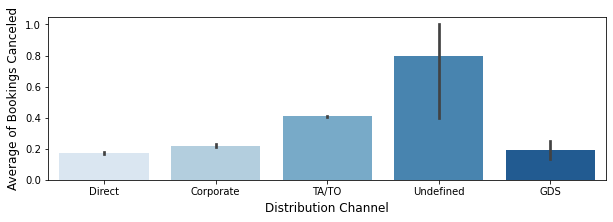

In [97]:
bivarwithtarget('is_canceled','distribution_channel','Canceled','Not Canceled','Distribution Channel',HotelDf,10,3,'Bookings Canceled')

* **`TA/TO` (Travel Agents/Tour Operators) have highest cancellation rate**
* **`Direct` has a simlar to `Maket Segment` has a lower cancellation rate**

**** Bivarient analysis for Deposit_Type on the Target Variable(Is_Canceled) ******
***********************************************************************************

╒═════════╤════════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Deposit Type   │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪════════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ No Deposit     │              29585 │          28.38 │                  74653 │             71.62 │
├─────────┼────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ Non Refund     │              14494 │          99.36 │                     93 │              0.64 │
├─────────┼────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       2 │ Refundable     │                 36

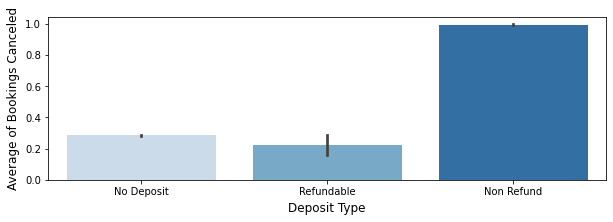

In [98]:
bivarwithtarget('is_canceled','deposit_type','Canceled','Not Canceled','Deposit Type',HotelDf,10,3,'Bookings Canceled')

* **The `Non Refundable Deposit` has the highest cancellation then other Deposit Types** 
* **The hotel has protection from losing out on revenue by implementing the `Non Refund Deposit`**

**** Bivarient analysis for Reserved_Room_Type on the Target Variable(Is_Canceled) ******
*****************************************************************************************

╒═════════╤══════════════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Reserved Room Type   │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪══════════════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ A                    │              33624 │          39.16 │                  52239 │             60.84 │
├─────────┼──────────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ B                    │                285 │          31.42 │                    622 │             68.58 │
├─────────┼──────────────────────┼────────────────────┼────────────────┼────────────────────────┼──────────────

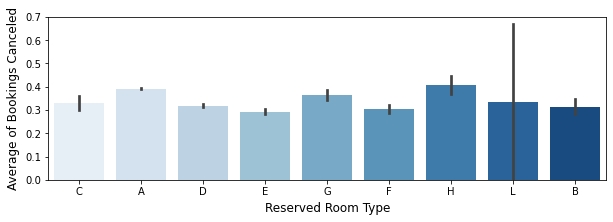

In [99]:
bivarwithtarget('is_canceled','reserved_room_type','Canceled','Not Canceled','Reserved Room Type',HotelDf,10,3,'Bookings Canceled')

* ** Customers who `reserved room type P` have the highest percentage booking cancellation with `100%` of bookings canceled.**
* **As the dataset did not provide the actual room designations for anonymity purposes, it is hard to interpret why bookings of room type `P` are canceled more often.**

**** Bivarient analysis for Assigned_Room_Type on the Target Variable(Is_Canceled) ******
*****************************************************************************************

╒═════════╤══════════════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Assigned Room Type   │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪══════════════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ A                    │              32941 │          44.53 │                  41042 │             55.47 │
├─────────┼──────────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ B                    │                430 │          21.81 │                   1542 │             78.19 │
├─────────┼──────────────────────┼────────────────────┼────────────────┼────────────────────────┼──────────────

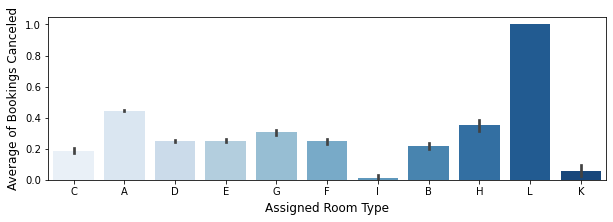

In [100]:
bivarwithtarget('is_canceled','assigned_room_type','Canceled','Not Canceled','Assigned Room Type',HotelDf,10,3,'Bookings Canceled')

* ** Customers who `assigned room type` `P` and `L` have the highest percentage booking cancellation with `100%` of bookings canceled.**

**** Bivarient analysis for Previous_Cancellations_New on the Target Variable(Is_Canceled) ******
*************************************************************************************************

╒═════════╤═════════════════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Previous Cancellation   │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪═════════════════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ No                      │              38177 │          33.93 │                  74333 │             66.07 │
├─────────┼─────────────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ Yes                     │               5938 │          91.68 │                    539 │              8.32 │
╘═════════╧═════════════════════════╧════════════════════╧════════════════╧══

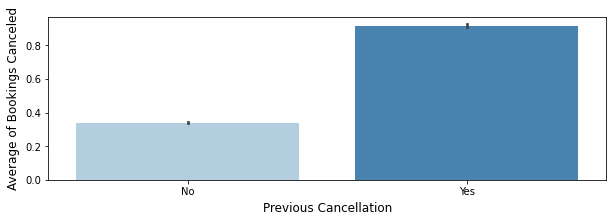

In [101]:
bivarwithtarget('is_canceled','previous_cancellations_new','Canceled','Not Canceled','Previous Cancellation',HotelDf,10,3,'Bookings Canceled')

**** Bivarient analysis for Previous_Bookings_Not_Canceled_New on the Target Variable(Is_Canceled) ******
*********************************************************************************************************

╒═════════╤══════════════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Reserved Room Type   │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪══════════════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ No                   │              43915 │          38.06 │                  71460 │             61.94 │
├─────────┼──────────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ Yes                  │                200 │           5.54 │                   3412 │             94.46 │
╘═════════╧══════════════════════╧════════════════════╧════════════════╧═══════

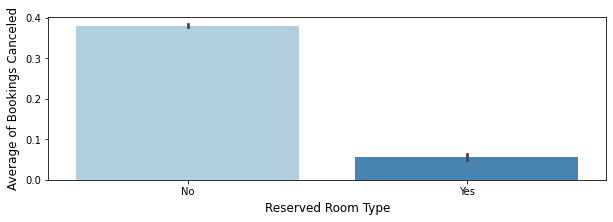

In [102]:
bivarwithtarget('is_canceled','previous_bookings_not_canceled_new','Canceled','Not Canceled','Reserved Room Type',HotelDf,10,3,'Bookings Canceled')

### Correlations

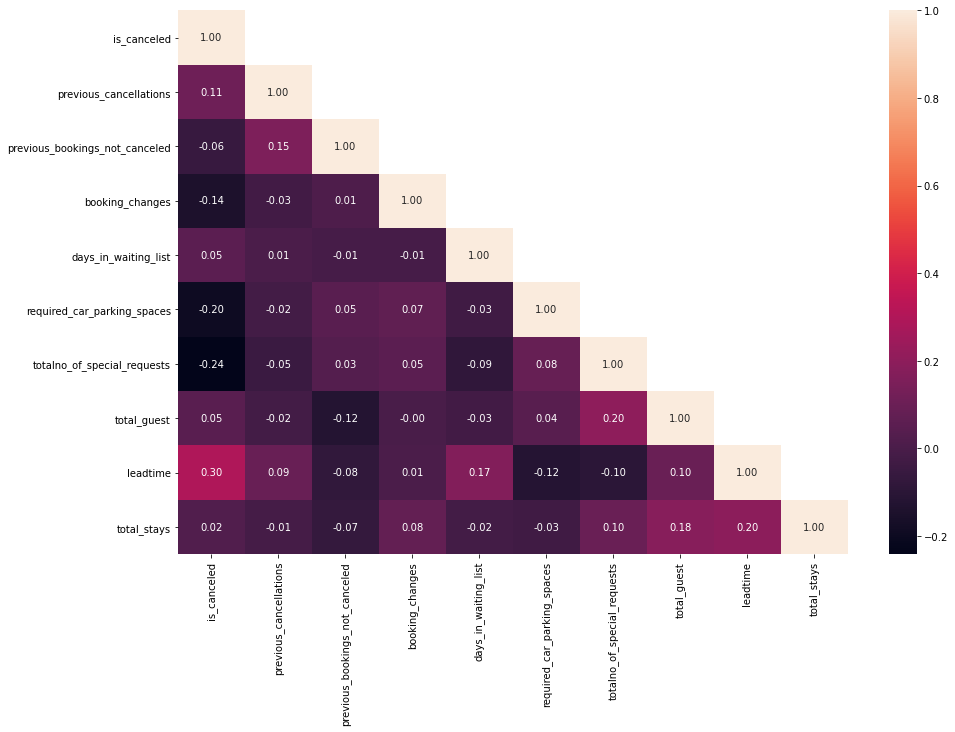

In [103]:
#Heat map - Relationalship analysis
plt.figure(figsize=(15,10))
sns.heatmap(HotelDf.drop(['booking_changes_new','adults','children','leadtime_month','stays_in_weekend_nights','stays_in_week_nights'],axis=1).corr(),mask=np.triu(HotelDf.drop(['booking_changes_new','adults','children','leadtime_month','stays_in_weekend_nights','stays_in_week_nights'],axis=1).corr(),+1),fmt='.2f',annot=True);

#### Relationship on Target Varible. - Top 3
*  `Lead time` is the most highly correlated(`0.29`) feature with whether or not a booking `is_canceled`. It makes sense that as the number of days between when the booking is made and the supposed arrival date increases, customers have more time to cancel the reservation and there is more time for an unforeseen circumstance derailing travel plans to arise.     

*  The `total number of special requests` is the second highest feature with the strongest correlation (`-0.23`)to our `is_canceled` target. As the number of special requests made increases, the likelihood that a booking is canceled decreases. This suggests that engagement with the hotel prior to arrival and feeling like their needs are heard may make a customer less likely to cancel their reservation.

*  The number of `required car parking spaces` is the third highest feature with the strongest correlation of (`-0.20`) to the `is_canceled` target. As the number of parking spaces requests increases, the likelihood that a booking is canceled decreases. There is a potential reasons for this relationship are discussed later on. 

#### Relationship Between Predictors

* There is a modarate correlation(`0.17`) between `days_in_waiting_list` and the `lead_time`. Since both are related to no of days so can this could be the modarate correlation. We need further investigation on the multicoliniraty and decide on the feature seleaction.

* We also see more features have modorate correlation with `lead_time`
    * **`lead_time`  VS `total_stays`           - `0.16`**
    * **`lead_time`  VS `required_car_parking`  - `0.12`**
    * **`lead_time`  VS `required_car_parking`  - `0.10`**

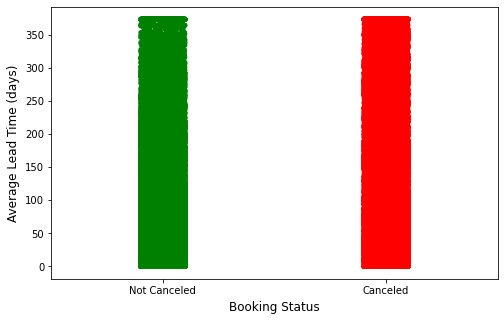

In [104]:
plt.figure(figsize=(8,5)) 
sns.stripplot(x=HotelDf['is_canceled'], y=HotelDf['leadtime'], palette=['green', 'red'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Lead Time (days)", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

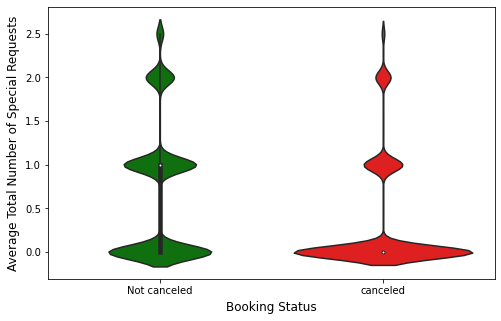

In [105]:
plt.figure(figsize=(8,5)) 
sns.violinplot(x=HotelDf['is_canceled'], y=HotelDf['totalno_of_special_requests'], palette=['green', 'red'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Total Number of Special Requests", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not canceled', 'canceled']);

**Customers who cancel their bookings make on average fewer special requests. The potential reasons what were discussed above.**

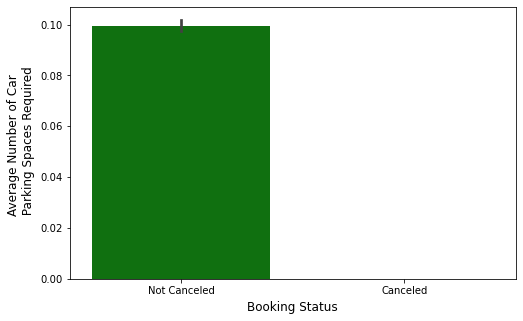

In [106]:
plt.figure(figsize=(8,5)) 
sns.barplot(x=HotelDf['is_canceled'], y=HotelDf['required_car_parking_spaces'], palette=['green', 'red'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Car \n Parking Spaces Required", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

* **The customers are not cancelled their bookings tend to require more parking spaces.**
* **From customer point of view they should think where they park their car in case no parking avilable.**
* **The need for a parking space would limit the customer in their hotel options and make them less likely to cancel.**

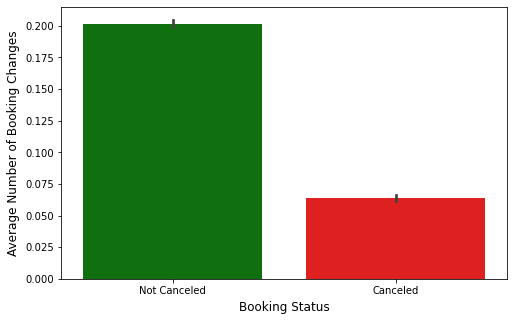

In [107]:
plt.figure(figsize=(8,5)) 
sns.barplot(x=HotelDf['is_canceled'], y=HotelDf['booking_changes_new'], palette=['green', 'red'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Average Number of Booking Changes", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

* **The Booking that has changes are lower cancelation compared to the booking that's never been changed(original booking)**

In [108]:
# Drop the duplicates
# HotelDf.drop_duplicates(inplace=True)

### Removal of unwanted variables (if applicable)

In [109]:
HotelDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118987 entries, 0 to 119389
Data columns (total 41 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   hotel                               118987 non-null  object        
 1   is_canceled                         118987 non-null  int64         
 2   booking_date                        118987 non-null  datetime64[ns]
 3   arrival_date                        118987 non-null  datetime64[ns]
 4   stays_in_weekend_nights             118987 non-null  int64         
 5   stays_in_week_nights                118987 non-null  int64         
 6   adults                              118987 non-null  int64         
 7   children                            118987 non-null  int64         
 8   meal                                118987 non-null  object        
 9   country                             118987 non-null  object        
 10  market_s

**** Bivarient analysis for Book_Via_Company on the Target Variable(Is_Canceled) ******
***************************************************************************************

╒═════════╤═════════════════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Company Booking         │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪═════════════════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ Booking Not Via Company │              42935 │          38.26 │                  69286 │             61.74 │
├─────────┼─────────────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ Booking Via Company     │               1180 │          17.44 │                   5586 │             82.56 │
╘═════════╧═════════════════════════╧════════════════════╧════════════════╧══════════════════════

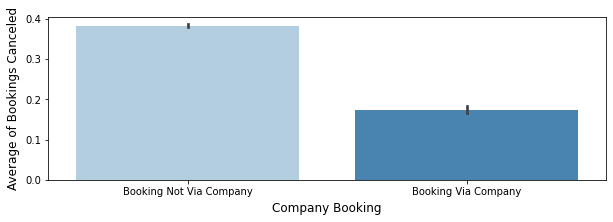

In [110]:
bivarwithtarget('is_canceled','book_via_company','Canceled','Not Canceled','Company Booking',HotelDf,10,3,'Bookings Canceled')

* **`Booking Not Via Company` has a higher impact on the cancellation rate**

In [111]:
HotelDf['book_by_agent']=HotelDf.apply(Split_Values_By_Two,args=('agent','No Agent','Not Agent Booking','Agent Booking'),axis=1)

**** Bivarient analysis for Book_By_Agent on the Target Variable(Is_Canceled) ******
************************************************************************************

╒═════════╤════════════════════╤════════════════════╤════════════════╤════════════════════════╤═══════════════════╕
│   Index │ Booking by Agent   │   Canceled - Count │   Canceled - % │   Not Canceled - Count │   Not Canceled- % │
╞═════════╪════════════════════╪════════════════════╪════════════════╪════════════════════════╪═══════════════════╡
│       0 │ Agent Booking      │              40104 │          39.04 │                  62620 │             60.96 │
├─────────┼────────────────────┼────────────────────┼────────────────┼────────────────────────┼───────────────────┤
│       1 │ Not Agent Booking  │               4011 │          24.66 │                  12252 │             75.34 │
╘═════════╧════════════════════╧════════════════════╧════════════════╧════════════════════════╧═══════════════════╛


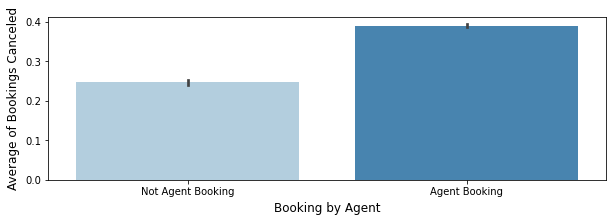

In [112]:
bivarwithtarget('is_canceled','book_by_agent','Canceled','Not Canceled','Booking by Agent',HotelDf,10,3,'Bookings Canceled')

* **We can see the Booking made by the agent has the higest cancellation rate**

In [113]:
#Check for missing value
print('****Missing Values in the Dataset****')
print('*************************************')
msv = HotelDf.isnull().sum()[HotelDf.isnull().sum()>0]
if msv.empty:
    print('There is no missing values in the data.') 
else:
    for i in range(msv.count()):
        print('{} Missing values in {} which is {}% of total data'.format(msv[i],msv.index[i],round(((msv[i]/HotelDf.shape[0])*100),2)))

****Missing Values in the Dataset****
*************************************
There is no missing values in the data.


# Highlevel Infrences

* **Almost half of the booking were made from (Portugal) Iso3166 code (PRT)**
    *    Reference https://www.iso.org/obp/ui/#iso:code:3166:PT
* **The Hotel type 1 is more favored compared to type 2**
* **There is a discrepancy of reserved room type and assigned room type, hotel might have room that's not sold to the public**
* **The deposit type 'No deposit' have highest may cause the highest cancellation (So customer will not have anything to lose in this no deposit case)**
* **Most popular room is room type A**
* ** The meal type Only Breakfast so most of customers could choosed for one night stay or corporate customers who stay for office meetings the customer_type 'Transient' proves this**
* **There's 0 adult in the data as well we will do a deeper analysis on this because is impossible to have a booking with 0 adult**
* **Days in waiting list have a highest impact for the cancellation this could be due to important events in the hotel where located**

In [114]:
HotelDf.to_csv('EDA_Final.csv',index=False)

In [115]:
#!pip install xgboost

In [116]:
import pandas as pd;import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, roc_auc_score,roc_curve,accuracy_score, recall_score, confusion_matrix,classification_report, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from IPython.display import HTML 
from sklearn.metrics import precision_recall_fscore_support as score

In [117]:
pd.set_option('display.max_columns', None)

### Load the data and high level validattion

In [118]:
# HotelDf = pd.read_csv('Hotel_EDA_Final.csv') # Load the csv file post pre pressing and EDA
# HotelDf.head(5) # List the first 5 values fromt he data

In [119]:
HotelDf['agent'] = HotelDf['agent'].apply(lambda x: 0 if x=='No Agent' else x)

In [120]:
# Preprocessing labels using .map because there are only 2 unique values
HotelDf['hotel_encoded'] = HotelDf['hotel'].map({'type_1': 1, 'type_2':0})
HotelDf['previous_cancellations_encoded'] = HotelDf['previous_cancellations_new'].map({'Yes': 1, 'No':0})
HotelDf['previous_cancellations_not_encoded'] = HotelDf['previous_bookings_not_canceled_new'].map({'Yes': 1, 'No':0})
HotelDf['book_via_company_encoded'] =HotelDf['book_via_company'].map({'Booking Via Company':1, 'Booking Not Via Company':0})
HotelDf['book_by_agent_encoded'] =HotelDf['book_by_agent'].map({'Agent Booking':1, 'Not Agent Booking':0})

deposit_type_encoded = pd.get_dummies(HotelDf['deposit_type'],prefix="deposit_type",drop_first=True)
market_segment_encoded = pd.get_dummies(HotelDf['market_segment'],prefix="market_segment",drop_first=True)
distribution_channel_encoded = pd.get_dummies(HotelDf['distribution_channel'],prefix="distribution_channel",drop_first=True)
customer_type_encoded = pd.get_dummies(HotelDf['customer_type'],prefix="customer_type",drop_first=True)
assigned_room_type_encoded = pd.get_dummies(HotelDf['assigned_room_type'],prefix="assigned_room_type",drop_first=True)
location_encoded = pd.get_dummies(HotelDf['location'],prefix="location",drop_first=True)
meal_encoded = pd.get_dummies(HotelDf['meal'],prefix="meal",drop_first=True)

HotelDf = pd.concat([HotelDf,deposit_type_encoded,market_segment_encoded,distribution_channel_encoded,customer_type_encoded,assigned_room_type_encoded,location_encoded,meal_encoded],axis=1)

#HotelDf['booking_date'] = HotelDf['booking_date'].str.replace('-','')
#$HotelDf['arrival_date'] = HotelDf['arrival_date'].str.replace('-','')

HotelDf['booking_date'] = pd.to_datetime(HotelDf['booking_date']).dt.strftime('%d%m%Y').astype('int')
HotelDf['arrival_date'] = pd.to_datetime(HotelDf['arrival_date']).dt.strftime('%d%m%Y').astype('int')


#Drop Encoded variables
HotelDf.drop(['deposit_type','market_segment','distribution_channel','customer_type','assigned_room_type','location','hotel','previous_cancellations_new','previous_bookings_not_canceled_new','book_via_company','book_by_agent'],axis=1,inplace=True)

#Drop Other variables
ModelDf = HotelDf.drop(['company','arrival_date','booking_changes','book_by_agent_encoded','country_type','c_name','country','leadtime_month','previous_cancellations','is_repeated_customer','previous_bookings_not_canceled','children','stays_in_weekend_nights','total_stays','stays_in_week_nights','meal','total_guest','days_in_waiting_list','adults','a_day_of_week','a_month','a_day','a_weekno','a_year','reserved_room_type'],axis=1).copy()

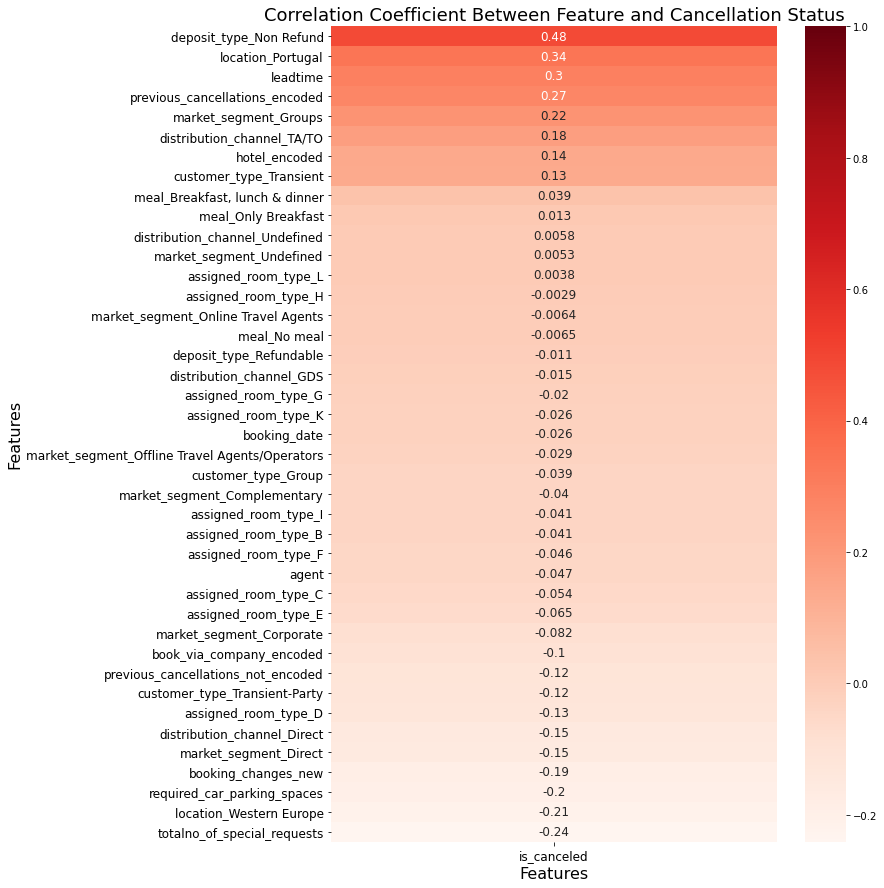

In [121]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(10,15))
ax = sns.heatmap(ModelDf.corr()[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Reds')
ax.set_title('Correlation Coefficient Between Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

In [122]:
cordf = ModelDf.corr()[['is_canceled']].sort_values('is_canceled', ascending=False)
cordf[(cordf['is_canceled']>=0.1) | (cordf['is_canceled']<=-0.1)]

,is_canceled
is_canceled,1.000000
deposit_type_Non Refund,0.482033
location_Portugal,0.337683
leadtime,0.295044
previous_cancellations_encoded,0.271239
market_segment_Groups,0.222251
distribution_channel_TA/TO,0.176111
hotel_encoded,0.137260
customer_type_Transient,0.133227
previous_cancellations_not_encoded,-0.115532


In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(ModelDf.drop(['is_canceled','agent','booking_date'],axis=1).values, ix) for ix in range(ModelDf.drop(['is_canceled','agent','booking_date'],axis=1).shape[1])] 
i=0
vs = [[None for j in range(3)] for i in range(ModelDf.drop(['is_canceled','agent','booking_date'],axis=1).columns.shape[0])]

for column in ModelDf.drop(['is_canceled','agent','booking_date'],axis=1).columns:
        if vif[i] <= 1:
            corrange='Not'
        elif vif[i] >1 and vif[i] <10:
            corrange ='Moderately'
        else:
            corrange ='Highly'
        #print(f"Column {column} --> VIF : {round(vif[i],2)} and {corrange} correlated")
        vs[i][0] = column
        vs[i][1] = round(vif[i],2)
        vs[i][2] = corrange
        i=i+1
vdf = pd.DataFrame(data=vs,columns=['Feature','Corr','CorrFactor'])

In [124]:
vdf[vdf['CorrFactor']=='Highly']

,Feature,Corr,CorrFactor
12,market_segment_Direct,16.37,Highly
13,market_segment_Groups,18.66,Highly
14,market_segment_Offline Travel Agents/Operators,22.51,Highly
15,market_segment_Online Travel Agents,54.64,Highly
17,distribution_channel_Direct,12.43,Highly
19,distribution_channel_TA/TO,56.53,Highly
22,customer_type_Transient,23.63,Highly


<AxesSubplot:>

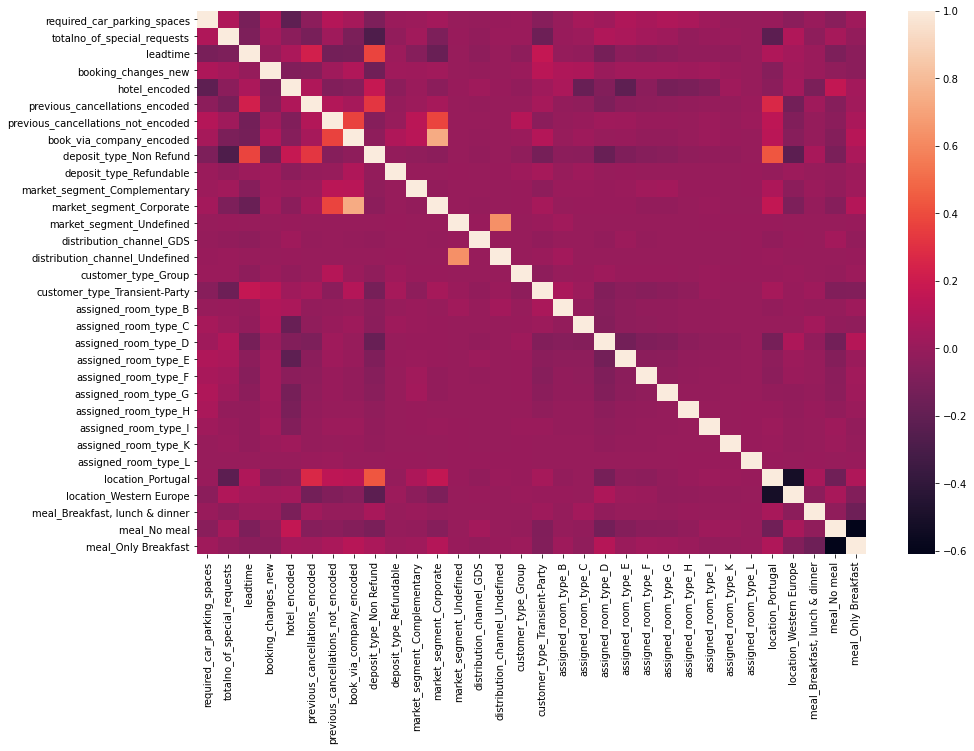

In [125]:
plt.figure(figsize=(15,10))
sns.heatmap(ModelDf[vdf[vdf['CorrFactor']!='Highly']['Feature']].corr())

In [126]:
def display_dataframe(df):
    numeric_col_mask = df.dtypes.apply(lambda d: issubclass(np.dtype(d).type, np.number))

    # Dict used to center the table headers
    d = dict(selector="th",
        props=[('text-align', 'center')])

    # Style
    display(df.style.set_properties(subset=df.columns[numeric_col_mask], # right-align the numeric columns and set their width
                            **{'width':'5em', 'height':'3em','text-align':'right','border-color': 'white','border-style' :'solid'})\
            .set_properties(subset=df.columns[~numeric_col_mask], # left-align the non-numeric columns and set their width
                            **{'width':'5em', 'text-align':'left'})\
            .format(lambda x: '{:,.0f}'.format(x) if x > 1e3 else '{:,.2f}'.format(x), # format the numeric values
                    subset=pd.IndexSlice[:,df.columns[numeric_col_mask]])\
            .hide_index()\
#            .highlight_max('color: green')\
            .set_table_styles([d])) # center the header

In [127]:
#AUC and ROC Value
def roc_model(model_name,x,y):
    # predict probabilities
    probs = model_name.predict_proba(x)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC
    from sklearn.metrics import roc_auc_score
    auc = roc_auc_score(y, probs)
    fpr, tpr, _ = roc_curve(y, probs)
    return probs,auc,fpr,tpr

In [128]:
def con_mat(y_train,y_predict_train,y_test,y_predict_test):
    fig, axis=plt.subplots(nrows=1,ncols=2)
    fig.set_size_inches(10,4)
    fig.tight_layout()

    cm=confusion_matrix(y_train,y_predict_train,labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Not Canceled","Canceled"]],
    columns = [i for i in ["Not Canceled","Canceled"]])
    sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[0])
    axis[0].title.set_text('Confustion Matrix - Train Data')

    cm=confusion_matrix(y_test,y_predict_test,labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Not Canceled","Canceled"]],
    columns = [i for i in ["Not Canceled","Canceled"]])
    sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[1])
    axis[1].title.set_text('Confustion Matrix - Test Data')

In [129]:
def scores_train_test(model,X_train,X_test,y_train,y_test,y_predict_train,y_predict_test,mname,model_name):
    #model=bgcl
    from IPython.display import HTML 
    from sklearn.metrics import precision_recall_fscore_support as score

    s = [[None for j in range(6)] for i in range(2)]

    print(model_name)
    print('********************************\n')

    #model_name = str(model).split('(')[0]
    s[0][0] = model_name + '_' + mname +'_Train'
    s[1][0] = model_name + '_' + mname +'_Test'
    
    report_train = classification_report(y_train, y_predict_train, output_dict=True)
    report_test = classification_report(y_test, y_predict_test, output_dict=True)

    s[0][1]=round(report_train['1']['precision']*100,2)
    s[1][1]=round(report_test['1']['precision']*100,2)

    s[0][2]=round(report_train['1']['recall']*100,2)
    s[1][2]=round(report_test['1']['recall']*100,2)

    s[0][3]=round(report_train['1']['f1-score']*100,2)
    s[1][3]=round(report_test['1']['f1-score']*100,2)

    s[0][4]=round(report_train['accuracy']*100,2)
    s[1][4]=round(report_test['accuracy']*100,2)

    probs, auc, fpr, tpr = roc_model(model,X_train,y_train)
    probst, auc1, fpr1, tpr1 = roc_model(model,X_test,y_test)

    s[0][5]=round(auc*100,2)
    s[1][5]=round(auc1*100,2)

    df = pd.DataFrame(data=s,columns=['Scores','Precision','Recall','F-Score','Accuracy','AUC'])

    con_mat(y_train,y_predict_train,y_test,y_predict_test)

    plt.figure(figsize=(5,5))

    plt.plot(fpr,tpr, marker='o', label='AUC - Train:' + str(s[0][5]))
    plt.plot(fpr1,tpr1, marker='o', label='AUC - Test:' + str(s[1][5]))

    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')

    display_dataframe(df)
    return(df)

In [130]:
def con_mat_r(y_train,y_predict_train,y_test,y_predict_test,nc,he,wi,tit):
    nc = len(y_predict_train)

    fig, axis=plt.subplots(nrows=nc,ncols=2)
    fig.set_size_inches(he,wi)
    fig.tight_layout()

    
    c=0
    for i in y_predict_train:
        cm=confusion_matrix(y_train,i,labels=[0, 1])

        df_cm = pd.DataFrame(cm, index = [i for i in ["Not Canceled","Canceled"]],
        columns = [i for i in ["Not Canceled","Canceled"]])

        sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[c][0])
        axis[c][0].title.set_text(tit[c] + ' - Train Data')
        c=c+1

    c=0
    for i in y_predict_test:
        cm=confusion_matrix(y_test,i,labels=[0, 1])

        df_cm = pd.DataFrame(cm, index = [i for i in ["Not Canceled","Canceled"]],
        columns = [i for i in ["Not Canceled","Canceled"]])

        sns.heatmap(df_cm, annot=True ,fmt='g',ax=axis[c][1])
        axis[c][1].title.set_text(tit[c] + ' - Test Data')
        c=c+1


### Split the data for training and testing

In [131]:
X = ModelDf.drop('is_canceled',axis=1)
y = ModelDf['is_canceled']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.15,random_state=9)

In [133]:
X_train.shape

(101138, 41)

In [134]:
X_test.shape

(17849, 41)

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [136]:
sc_train = scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(sc_train, index=X_train.index, columns=X_train.columns)

In [137]:
sc_test = psc_test = scaler.transform(X_test)
X_test_sc = pd.DataFrame(sc_test, index=X_test.index, columns=X_test.columns)

In [138]:
from sklearn.tree import DecisionTreeClassifier

Decision_Tree
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
Decision_Tree_Base_Train,99.55,98.56,99.05,99.30,99.99
Decision_Tree_Base_Test,79.87,80.34,80.11,85.20,84.52


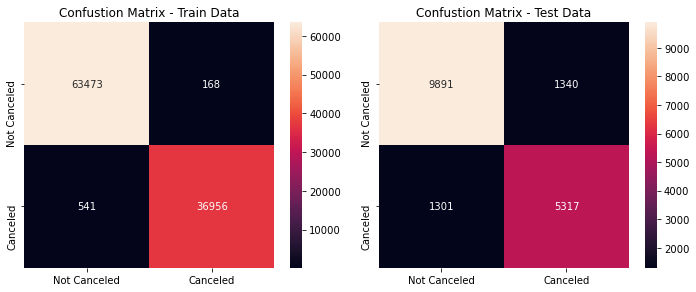

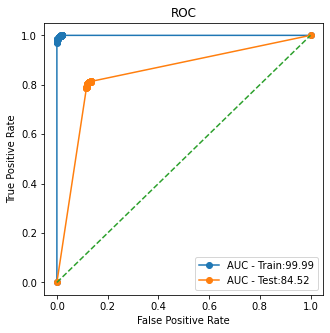

In [139]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train_sc,y_train)

dtree_train_predict = dtree.predict(X_train_sc)
dtree_test_predict = dtree.predict(X_test_sc)

res_df = scores_train_test(dtree,X_train_sc,X_test_sc,y_train,y_test,dtree_train_predict,dtree_test_predict,'Base','Decision_Tree')

In [140]:
tempdf=res_df.copy()

In [141]:
# invoke the LinearRegression function
lgr_model = LogisticRegression(random_state=0)
lgr_model.fit(X_train_sc,y_train)

lgr_train=lgr_model.predict(X_train_sc)
lgr_test=lgr_model.predict(X_test_sc)

LogisticRegression
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
LogisticRegression_Base_Train,80.55,61.73,69.89,80.28,88.24
LogisticRegression_Base_Test,80.10,61.85,69.80,80.16,88.37


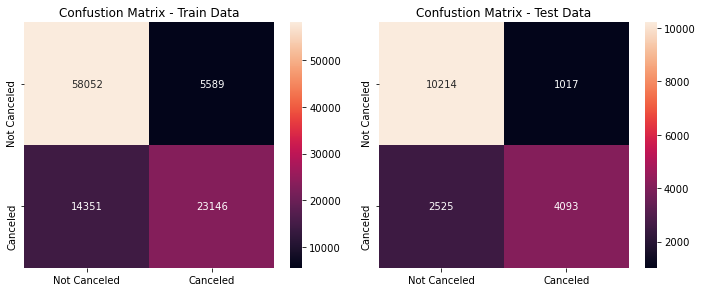

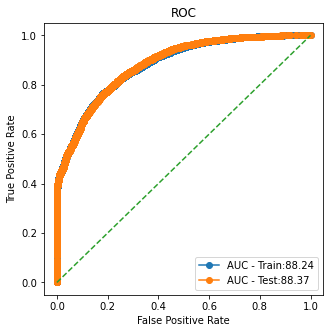

In [142]:
res_df = scores_train_test(lgr_model,X_train_sc,X_test_sc,y_train,y_test,lgr_train,lgr_test,'Base','LogisticRegression')

In [143]:
tempdf = pd.concat([tempdf,res_df])

In [144]:
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train_sc, y_train)

lda_model_ytrain_predict = lda_model.predict(X_train_sc)
lda_model_ytest_predict = lda_model.predict(X_test_sc)

LDA
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
LDA_Base_Train,83.48,55.31,66.54,79.37,87.88
LDA_Base_Test,83.17,55.35,66.47,79.29,88.00


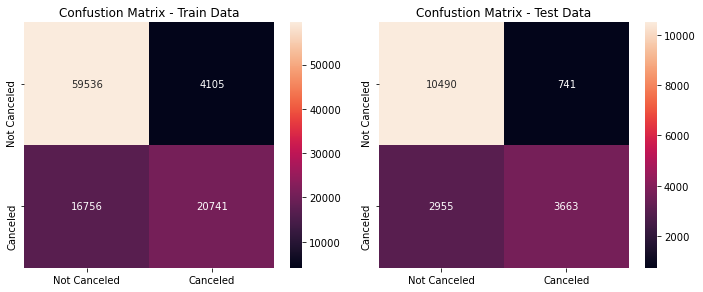

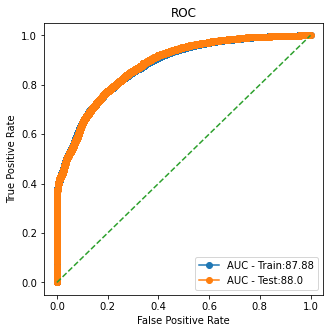

In [145]:
res_df=scores_train_test(clf,X_train_sc,X_test_sc,y_train,y_test,
                         lda_model_ytrain_predict,lda_model_ytest_predict,'Base','LDA')

In [146]:
tempdf = pd.concat([tempdf,res_df])

In [147]:
rfcl = RandomForestClassifier(random_state=0)

rfcl.fit(X_train_sc, y_train)
rf_train = rfcl.predict(X_train_sc)
rf_test = rfcl.predict(X_test_sc)

RandomForest
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
RandomForest_Base_Train,99.30,98.80,99.05,99.30,99.93
RandomForest_Base_Test,85.13,81.05,83.04,87.72,94.69


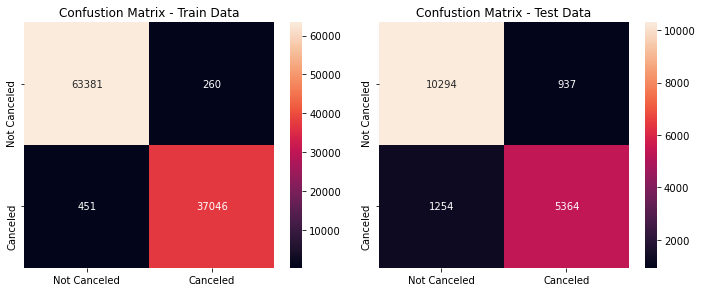

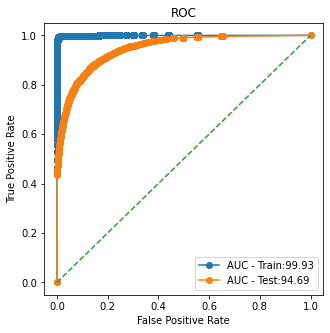

In [148]:
res_df = scores_train_test(rfcl,X_train_sc,X_test_sc,y_train,y_test,rf_train,rf_test,'Base','RandomForest')

In [149]:
#siva

In [150]:
tempdf = pd.concat([tempdf,res_df])

In [151]:
NB_model = GaussianNB()
NB_model.fit(X_train_sc, y_train)
NB_Model_y_predict_train = NB_model.predict(X_train_sc)
NB_Model_y_predict_test = NB_model.predict(X_test_sc)

GaussianNB
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
GaussianNB_Base_Train,97.97,38.08,54.84,76.75,81.16
GaussianNB_Base_Test,97.96,38.55,55.32,76.92,81.25


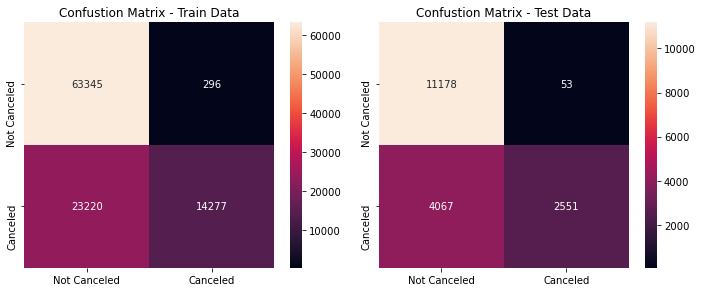

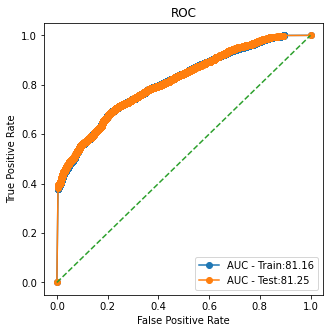

In [152]:
res_df=scores_train_test(NB_model,X_train_sc,X_test_sc,y_train,y_test,NB_Model_y_predict_train,NB_Model_y_predict_test,'Base','GaussianNB')

In [153]:
tempdf = pd.concat([tempdf,res_df])

In [154]:
xgbcl = XGBClassifier(use_label_encoder=True,objective='binary:hinge')
xgbcl.fit(X_train_sc,y_train)

xgtrainpredict = xgbcl.predict(X_train_sc)
xgtestpredict = xgbcl.predict(X_test_sc)

XGBoost
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
XGBoost_Base_Train,86.53,76.96,81.47,87.02,84.95
XGBoost_Base_Test,85.75,75.85,80.50,86.37,84.21


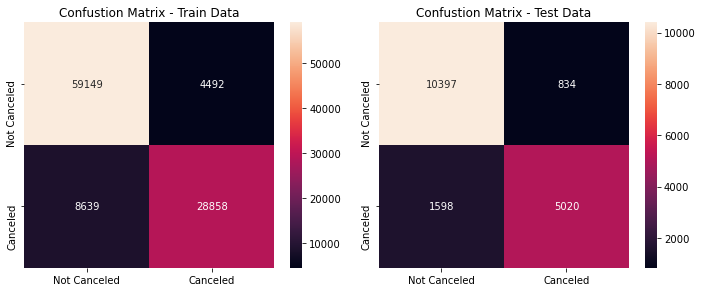

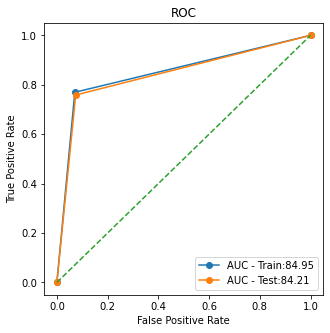

In [155]:
res_df=scores_train_test(xgbcl,X_train_sc,X_test_sc,y_train,y_test,xgtrainpredict,xgtestpredict,'Base','XGBoost')

In [156]:
tempdf = pd.concat([tempdf,res_df])

In [157]:
#Base model with K-Value as 5
KNN_Model = KNeighborsClassifier(n_neighbors=5)
KNN_Model.fit(X_train_sc,y_train)
KNN_train_p = KNN_Model.predict(X_train_sc)
KNN_test_p = KNN_Model.predict(X_test_sc)

KNN
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
KNN_Base_Train,86.94,81.78,84.28,88.69,96.01
KNN_Base_Test,80.32,75.28,77.72,83.99,90.25


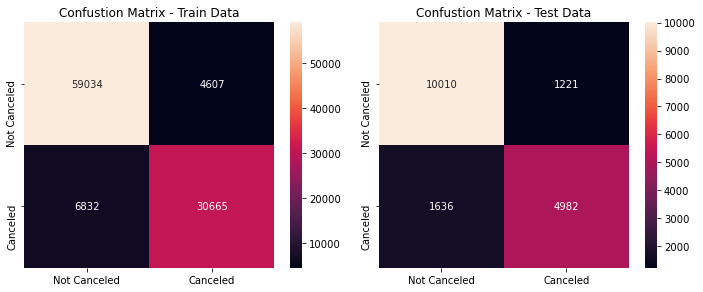

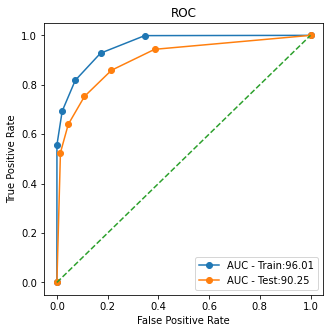

In [158]:
res_df=scores_train_test(KNN_Model,X_train_sc,X_test_sc,y_train,y_test,KNN_train_p,KNN_test_p,'Base','KNN')

In [159]:
tempdf = pd.concat([tempdf,res_df])

ANN
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
ANN_Base_Train,83.69,76.76,80.07,85.84,93.50
ANN_Base_Test,83.21,75.66,79.26,85.32,92.79


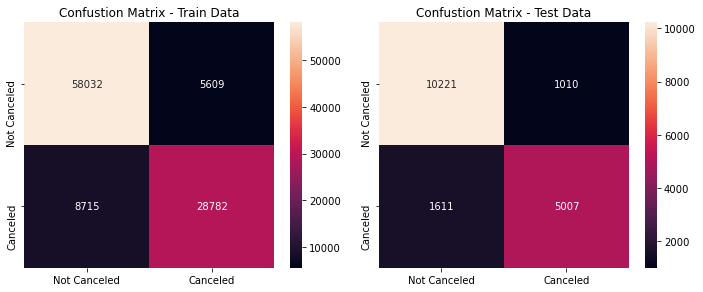

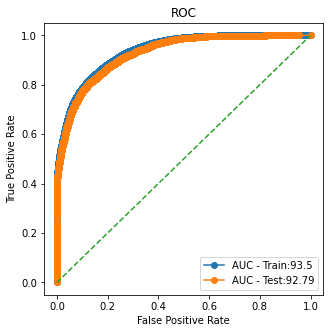

In [160]:
from sklearn.neural_network import MLPClassifier
NNModel = MLPClassifier(random_state=0)
NNModel.fit(X_train_sc,y_train)

NNTrainPredict = NNModel.predict(X_train_sc)
NNTestPredict = NNModel.predict(X_test_sc)
res_df=scores_train_test(NNModel,X_train_sc,X_test_sc,y_train,y_test,NNTrainPredict,NNTestPredict,'Base','ANN')
tempdf = pd.concat([tempdf,res_df])

In [161]:
def report_gen(tt,bagboost):
    tt = tt.reset_index().drop('index',axis=1)
    tt['Model']=tt['Scores'].str.split('_',n=1,expand=True)[0]
    tt['TT']=tt['Scores'].str.split('_',n=1,expand=True)[1].str.split('_',n=1,expand=True)[0]
    tt['BT']=tt['Scores'].str.split('_',n=1,expand=True)[1].str.split('_',n=1,expand=True)[1]
    tt.drop('Scores',axis=1,inplace=True)
    tt = tt[['Model','BT','TT','Precision','Recall','F-Score','Accuracy','AUC']]
    tt_report = tt[((tt['TT']!='Bagging') & (tt['TT']!='Boost'))]

    trg = tt_report.groupby(['Model','TT','BT'])['Precision','Recall','F-Score','Accuracy','AUC'].max().sort_values(by=['Model','TT','BT'],ascending=False)

    metdf = ((trg.T).reset_index()).rename(columns={'index': 'Model'})
    display_dataframe(metdf)

    if (bagboost == True):
        tt_bag = tt[(tt['TT']=='Bagging')]
        tt_boost = tt[(tt['TT']=='Boost')]
        trg_bag = tt_bag.groupby(['Model','TT','BT'])['Precision','Recall','F-Score','Accuracy','AUC'].max().sort_values(by=['Model','TT','BT'],ascending=False)
        trg_boost = tt_boost.groupby(['Model','TT','BT'])['Precision','Recall','F-Score','Accuracy','AUC'].max().sort_values(by=['Model','TT','BT'],ascending=False)
        metdf_bag = ((trg_bag.T).reset_index()).rename(columns={'index': 'Model'})
        metdf_boost = ((trg_boost.T).reset_index()).rename(columns={'index': 'Model'})
        display_dataframe(metdf_bag)
        display_dataframe(metdf_boost)

In [162]:
report_gen(tempdf,False)

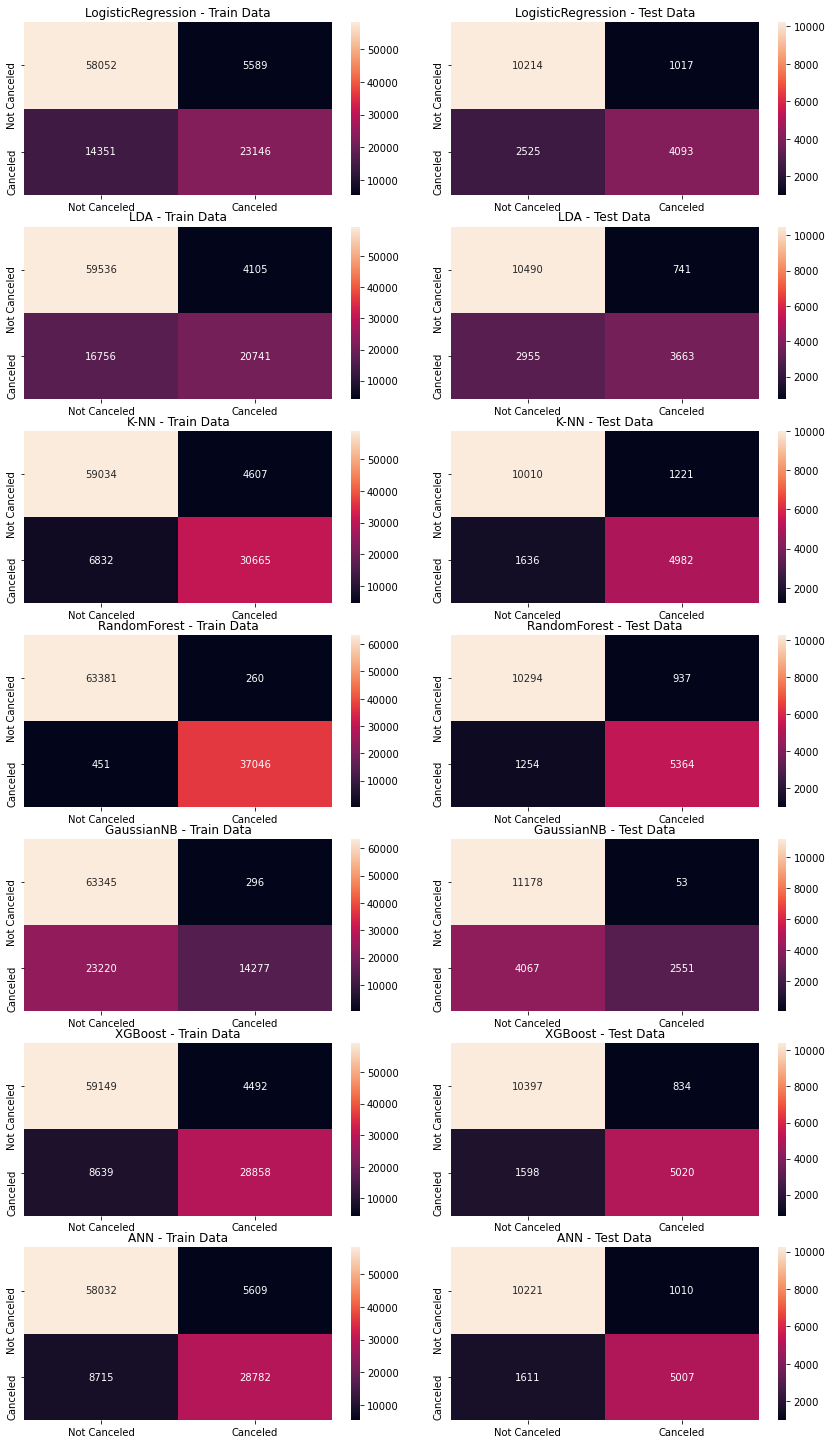

In [163]:
train_preds = [lgr_train,lda_model_ytrain_predict,KNN_train_p,rf_train,NB_Model_y_predict_train,xgtrainpredict,NNTrainPredict]

test_preds = [lgr_test,lda_model_ytest_predict,KNN_test_p,rf_test,NB_Model_y_predict_test,xgtestpredict,NNTestPredict]

mnames = ['LogisticRegression','LDA','K-NN','RandomForest','GaussianNB','XGBoost','ANN']

con_mat_r(y_train,train_preds,y_test,test_preds,2,12,20,mnames)

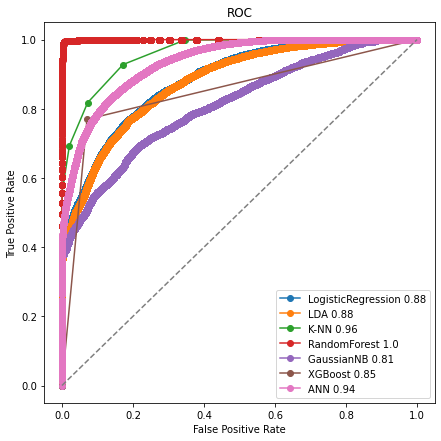

In [164]:
models=[lgr_model,lda_model,KNN_Model,rfcl,NB_model,xgbcl,NNModel]
plt.figure(figsize=(7,7))

c=0
for m in models:
    tprobs, tauc, tfpr, ttpr = roc_model(m,X_train_sc,y_train)
    plt.plot(tfpr,ttpr, marker='o', label=mnames[c] + ' ' + str(round(tauc,2)))
    
    c=c+1

plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

plt.show()

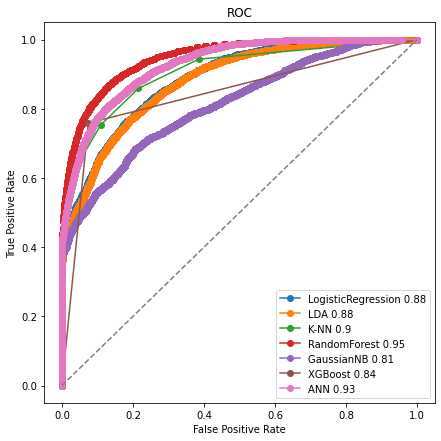

In [165]:
plt.figure(figsize=(7,7))
c=0
for m in models:
    tprobs, tauc, tfpr, ttpr = roc_model(m,X_test_sc,y_test)
    plt.plot(tfpr,ttpr, marker='o', label=mnames[c] + ' ' + str(round(tauc,2)))
    
    c=c+1

plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

plt.show()

#### Model Tuning - Decsion Tree

In [166]:
def dtrun(x_train,train_labels,x_test,crea,max_dep,min_sam,max_f):
    param_grid = {
        'criterion': crea,
        'max_depth': max_dep,
        'min_samples_leaf': min_sam,
        'min_samples_split': min_sam*3,
        'max_features' : max_f
    }


    dtcl = DecisionTreeClassifier(random_state=0)

    grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 3,scoring='accuracy')
    grid_search.fit(x_train, train_labels)
    print(grid_search.best_params_)
    dtree = grid_search.best_estimator_

    dtp_train=dtree.predict(x_train)
    dtp_test=dtree.predict(x_test)
    return(dtree,dtp_train,dtp_test)

In [167]:
dtree,dtree_train_predict,dtree_test_predict = dtrun(X_train_sc,y_train,X_test_sc,['gini'],[27,36],[3,6],[16,18,21])

{'criterion': 'gini', 'max_depth': 27, 'max_features': 16, 'min_samples_leaf': 3, 'min_samples_split': 3}


Decision_Tree
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
Decision_Tree_Tuned_Train,89.30,84.39,86.77,90.46,97.32
Decision_Tree_Tuned_Test,82.46,78.01,80.18,85.70,91.33


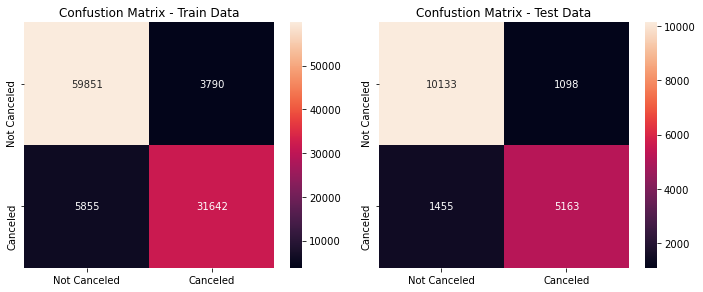

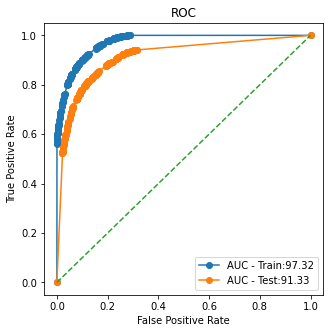

In [168]:
res_df = scores_train_test(dtree,X_train_sc,X_test_sc,y_train,y_test,dtree_train_predict,dtree_test_predict,'Tuned','Decision_Tree')

In [169]:
tempdf = pd.concat([tempdf,res_df])

#### Model Tuning - Logistic Regression

In [170]:
#Logistic Regression with GridSearc CV
def lgrun(x_train,train_labels,x_test,tol,max_iter,n_jobs,sol,C,penality,sco):
    param_grid = {
        'penalty': penality,
        'C':C,
        'max_iter':max_iter,
        'solver':sol,
        'n_jobs':n_jobs,
        'tol':tol
    },


    clf = LogisticRegression(random_state=0)

    grid_clf_acc = GridSearchCV(clf, param_grid = param_grid,scoring = sco,cv=3)
    grid_clf_acc.fit(x_train, train_labels)
    lgr_model=grid_clf_acc.best_estimator_
    print(grid_clf_acc.best_params_)    
    lgr_model
    lgr_train=lgr_model.predict(x_train)
    lgr_test=lgr_model.predict(x_test)

    return(lgr_model,lgr_train,lgr_test)

In [171]:
penalty=['none','11','l2',]
solver=['newton-cg','liblinear']#,,'lbfgs','sag','liblinear','saga']
tol=[0.01,0.001]
C =[0.1,0.01]
maxit = [2000]
njobs = [8,9]

lgr_model,lgr_train,lgr_test = lgrun(X_train_sc,y_train,X_test_sc,tol,maxit,njobs,solver,C,penalty,'accuracy')

{'C': 0.01, 'max_iter': 2000, 'n_jobs': 8, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.01}


LogisticRegression
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
LogisticRegression_Tuned_Train,80.69,61.58,69.85,80.29,88.23
LogisticRegression_Tuned_Test,80.27,61.86,69.88,80.22,88.36


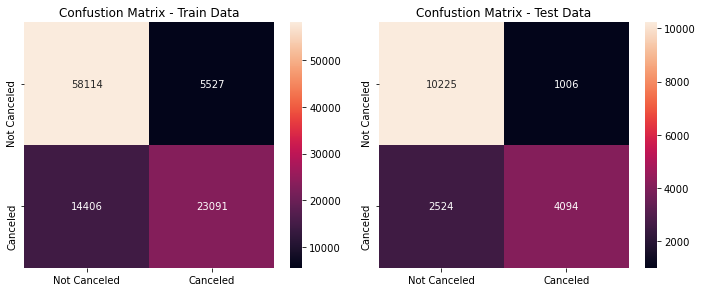

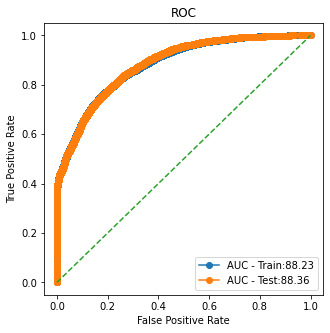

In [172]:
res_df = scores_train_test(lgr_model,X_train_sc,X_test_sc,y_train,y_test,lgr_train,lgr_test,'Tuned','LogisticRegression')

In [173]:
tempdf = pd.concat([tempdf,res_df])

Model Tuning - LinearDiscriminantAnalysis

In [174]:
#LDA with GridSearc CV
def ldarun(x_train,train_labels,x_test,tol,sol,sco):
    param_grid = {
        'solver':sol,
        'tol':tol,
        'n_components':[1,2]
    },
    
    clf = LinearDiscriminantAnalysis()

    grid_clf_acc = GridSearchCV(clf, param_grid = param_grid, cv=3,
                      scoring=sco,n_jobs=1 ,verbose =0)
                                
    grid_clf_acc.fit(x_train, train_labels)
    lda_model=grid_clf_acc.best_estimator_
    print(grid_clf_acc.best_params_)    
    lda_train=lgr_model.predict(x_train)
    lda_test=lgr_model.predict(x_test)
    return(lda_model,lda_train,lda_test)

In [175]:
solver=['svd','eigen']
tol=[0.01,0.01,0.00001]

lda_model,lda_model_ytrain_predict,lda_model_ytest_predict = ldarun(X_train_sc,y_train,X_test_sc,tol,solver,'accuracy')

{'n_components': 1, 'solver': 'svd', 'tol': 0.01}


LDA
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
LDA_Tuned_Train,80.69,61.58,69.85,80.29,87.88
LDA_Tuned_Test,80.27,61.86,69.88,80.22,88.00


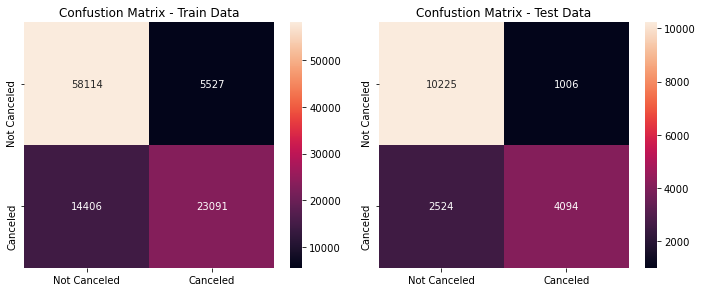

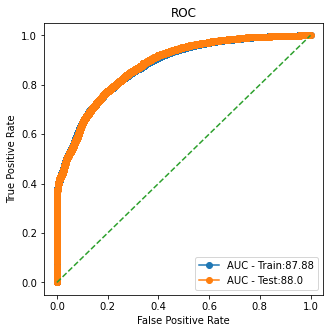

In [176]:
res_df=scores_train_test(clf,X_train_sc,X_test_sc,y_train,y_test,lda_model_ytrain_predict,lda_model_ytest_predict,'Tuned','LDA')

In [177]:
tempdf = pd.concat([tempdf,res_df])

Model Tuning - Random Forest

In [178]:
def rfrun(x_train,train_labels,x_test,max_f,no_est,max_dep,min_sam,min_spl):
    param_grid = {
        'criterion': ['gini'],
        'max_depth': max_dep, #,7,9],
        'max_features':max_f, #,32],
        'min_samples_leaf': min_sam,#15,20],
        'min_samples_split': min_spl,#75,60],
        'n_estimators': no_est
    }

    rfcl = RandomForestClassifier(random_state=0)

    grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 4,scoring='accuracy')
    grid_search.fit(x_train, train_labels)
    print(grid_search.best_params_)
    
    rfcl = grid_search.best_estimator_
    rfcl

    rf_train = rfcl.predict(x_train)
    rf_test = rfcl.predict(x_test)
    return(rfcl,rf_train,rf_test)   

In [179]:
from datetime import datetime
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 11:42:25


In [180]:
rfcl,rfcl_y_predict_train,rfcl_y_predict_test = rfrun(X_train_sc,y_train,X_test_sc,[18,19],[50,60],[22,23],[3],[6])

#rfcl = RandomForestClassifier(random_state=0,max_features=19,max_depth=22,n_estimators=50,min_samples_leaf=3,min_samples_split=6)
# rfcl.fit(X_train_sc,y_train)

# rfcl_y_predict_train = rfcl.predict(X_train_sc)
# rfcl_y_predict_test = rfcl.predict(X_test_sc)

#res_df = scores_train_test(rfcl,X_train_sc,X_test_sc,y_train,y_test,rfcl_y_predict_train,rfcl_y_predict_test,'Tuned','RandomForest')

{'criterion': 'gini', 'max_depth': 23, 'max_features': 18, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 60}


In [181]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:04:05.544646


RandomForest
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
RandomForest_Tuned_Train,90.90,84.01,87.32,90.95,97.79
RandomForest_Tuned_Test,86.77,78.51,82.44,87.60,94.93


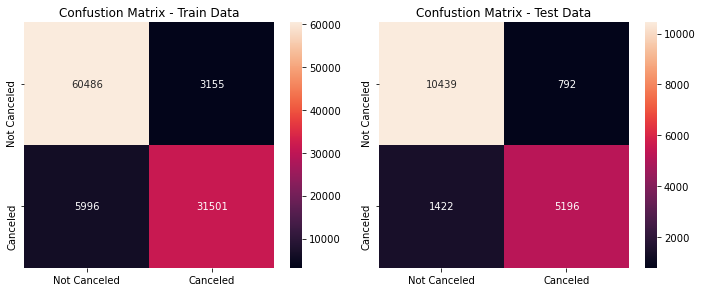

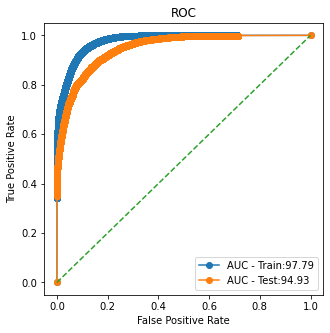

In [182]:
res_df = scores_train_test(rfcl,X_train_sc,X_test_sc,y_train,y_test,rfcl_y_predict_train,rfcl_y_predict_test,'Tuned','RandomForest')

In [183]:
tempdf = pd.concat([tempdf,res_df])

Model Tuning - XGBoost

In [184]:
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 11:46:33


In [185]:
xgbcl = XGBClassifier()
param_grid = {
     'n_estimators': [18],
     'colsample_bytree': [0.7],
     'max_depth': [19],
     'reg_alpha': [1.9],
     'min_child_weight': [2.5],
     'gamma': [4.2],
     'subsample': [0.9],
     'objective':['binary:hinge']
}
xgbcl = GridSearchCV(xgbcl, 
                    param_grid = param_grid, 
                    scoring = "accuracy", 
                    cv = 3)
xgbcl.fit(X_train_sc,y_train)
xgbcl.best_estimator_
# Dictionary of best parameters

# xgtrainpredict = xgbcl.predict(X_train_sc)
# xgtestpredict = xgbcl.predict(X_test_sc)

# res_df=scores_train_test(xgbcl,X_train_sc,X_test_sc,y_train,y_test,xgtrainpredict,xgtestpredict,'Tuned','XGBoost')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=4.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=19,
              min_child_weight=2.5, missing=nan, monotone_constraints='()',
              n_estimators=18, n_jobs=8, num_parallel_tree=1,
              objective='binary:hinge', random_state=0, reg_alpha=1.9,
              reg_lambda=1, scale_pos_weight=None, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [186]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:00:08.315306


In [187]:
xgtrainpredict = xgbcl.predict(X_train_sc)
xgtestpredict = xgbcl.predict(X_test_sc)

XGBoost
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
XGBoost_Tuned_Train,87.86,81.22,84.41,88.88,87.31
XGBoost_Tuned_Test,85.67,78.21,81.77,87.07,85.25


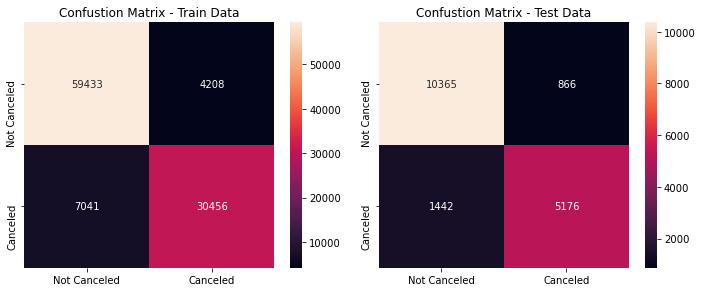

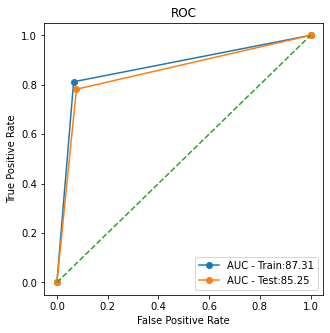

In [188]:
res_df=scores_train_test(xgbcl,X_train_sc,X_test_sc,y_train,y_test,xgtrainpredict,xgtestpredict,'Tuned','XGBoost')

In [189]:
tempdf = pd.concat([tempdf,res_df])

Model Tuning - Neural Networks

In [190]:
from datetime import datetime
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 11:46:42


In [191]:
param_grid = {
    'hidden_layer_sizes': [200,350],
    'max_iter': [500,750],
    'solver': ['sgd','adam'],
    'tol': [0.01,0.001],
}

nncl = MLPClassifier(random_state=9)

NNModel = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

NNModel.fit(X_train_sc, y_train)

NNModel.best_estimator_

MLPClassifier(hidden_layer_sizes=350, max_iter=500, random_state=9, tol=0.001)

In [192]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:19:19.469593


In [193]:
NNTrainPredict = NNModel.predict(X_train_sc)
NNTestPredict = NNModel.predict(X_test_sc)

ANN
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
ANN_Tuned_Train,84.68,73.86,78.90,85.36,93.05
ANN_Tuned_Test,84.46,73.00,78.31,85.01,92.68


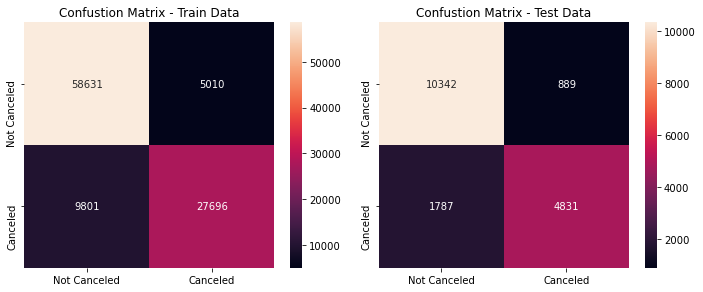

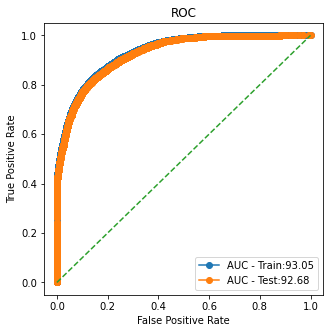

In [194]:
res_df=scores_train_test(NNModel,X_train_sc,X_test_sc,y_train,y_test,NNTrainPredict,NNTestPredict,'Tuned','ANN')

In [195]:
tempdf = pd.concat([tempdf,res_df])

Model Tuning - K-NN

In [196]:
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 12:06:04


In [197]:
acc=[]
for i in range(3,15,3):
    KNN_Model = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    KNN_Model.fit(X_train_sc,y_train)

    y_test_p = KNN_Model.predict(X_test_sc)
    score_knn = KNN_Model.score(X_test_sc,y_test)
    print(f'Accuracy Score for K={i} : ',score_knn)
    acc.append(score_knn)
    
MCE = [1 - x for x in acc]
MCE    

Accuracy Score for K=3 :  0.8361812986721945
Accuracy Score for K=6 :  0.8432965432237101
Accuracy Score for K=9 :  0.8444170541767045
Accuracy Score for K=12 :  0.8426242366519133


[0.16381870132780552,
 0.15670345677628994,
 0.15558294582329546,
 0.15737576334808667]

In [198]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:04:42.646279


Text(0, 0.5, 'Misclassification Error')

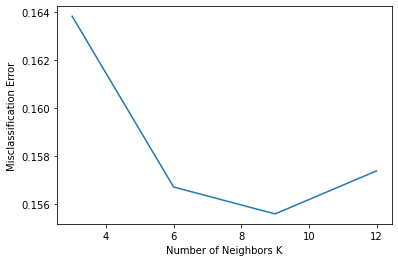

In [199]:
import matplotlib.pyplot as plt
plt.plot(range(3,15,3),MCE)

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

In [200]:
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 12:10:46


In [201]:
k=9
KNN_Model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
KNN_Model.fit(X_train_sc,y_train)
KNN_train_p = KNN_Model.predict(X_train_sc)
KNN_test_p = KNN_Model.predict(X_test_sc)
print(f'Accuracy Score for K={k} : ',KNN_Model.score(X_test_sc,y_test))

Accuracy Score for K=9 :  0.8444170541767045


In [202]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:04:48.032681


KNN
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
KNN_Tuned_Train,85.44,78.00,81.55,86.92,94.73
KNN_Tuned_Test,81.99,74.37,78.00,84.44,91.27


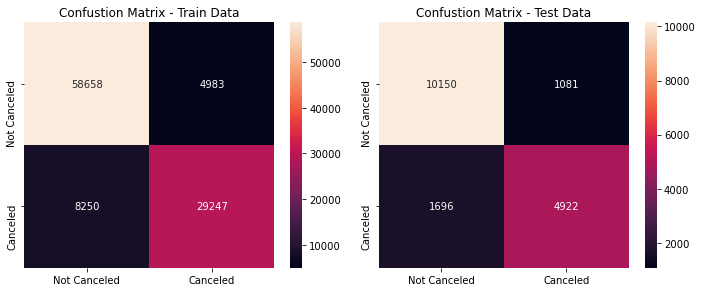

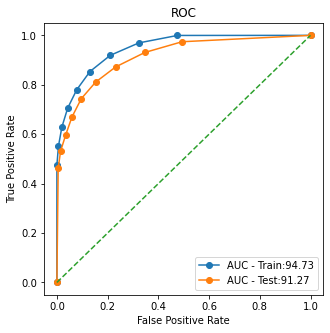

In [203]:
#KNN Model Scores
res_df=scores_train_test(KNN_Model,X_train_sc,X_test_sc,y_train,y_test,KNN_train_p,KNN_test_p,'Tuned','KNN')

In [204]:
tempdf = pd.concat([tempdf,res_df])

Model Tuning - GaussianNB

In [205]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
NB_model = GridSearchCV(estimator=NB_model, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
NB_model.fit(X_train_sc, y_train)

NB_model.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 1.873817422860383e-05}

In [206]:
NB_Model_y_predict_train = NB_model.predict(X_train_sc)
NB_Model_y_predict_test = NB_model.predict(X_test_sc)

GaussianNB
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
GaussianNB_Tuned_Train,85.01,47.71,61.12,77.50,81.16
GaussianNB_Tuned_Test,85.56,48.43,61.85,77.85,81.24


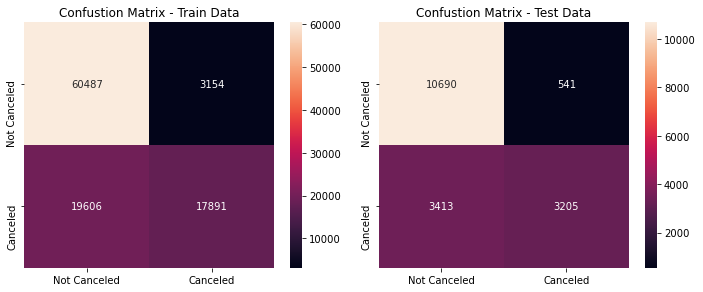

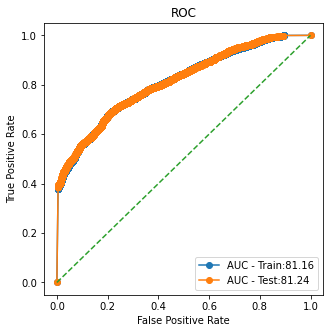

In [207]:
res_df=scores_train_test(NB_model,X_train_sc,X_test_sc,y_train,y_test,NB_Model_y_predict_train,NB_Model_y_predict_test,'Tuned','GaussianNB')

In [208]:
tempdf = pd.concat([tempdf,res_df])

In [209]:
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 12:20:43


Bagging Classifer

In [210]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=rfcl, n_estimators=50,random_state=0)

bgcl = bgcl.fit(X_train_sc, y_train)

bgcl_y_predict_train = bgcl.predict(X_train_sc)
bgcl_y_predict_test = bgcl.predict(X_test_sc)

In [211]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:06:58.584334


BaggingClassifier
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
BaggingClassifier_Bagging_Train,89.68,81.75,85.53,89.75,97.12
BaggingClassifier_Bagging_Test,86.88,77.56,81.96,87.34,94.83


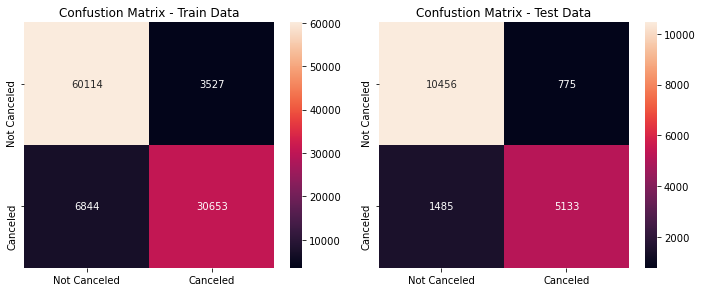

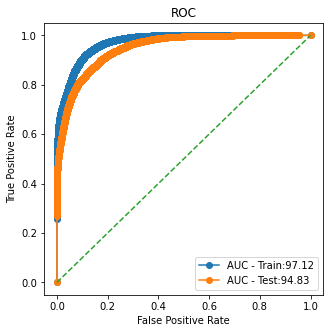

In [212]:
res_df = scores_train_test(bgcl,X_train_sc,X_test_sc,y_train,y_test,bgcl_y_predict_train,bgcl_y_predict_test,'Bagging','BaggingClassifier')

In [213]:
tempdf = pd.concat([tempdf,res_df])

AdaBoosting

In [214]:
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 12:28:56


In [215]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=150, random_state=9)

abcl = abcl.fit(X_train_sc, y_train)
abcl_y_predict_train = abcl.predict(X_train_sc)
abcl_y_predict_test = abcl.predict(X_test_sc)

In [216]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:00:14.985768


AdaBoostClassifier
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
AdaBoostClassifier_Boost_Train,82.09,68.76,74.84,82.86,90.99
AdaBoostClassifier_Boost_Test,82.32,68.25,74.63,82.79,91.17


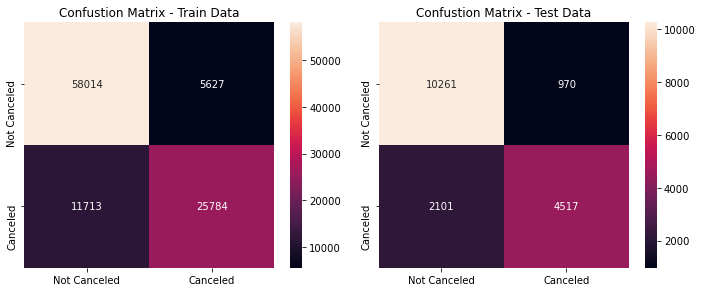

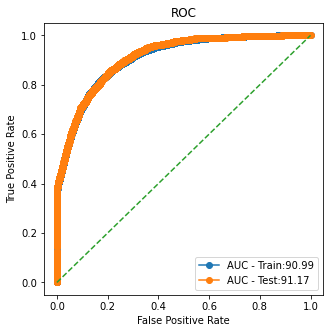

In [217]:
res_df = scores_train_test(abcl,X_train_sc,X_test_sc,y_train,y_test,abcl_y_predict_train,abcl_y_predict_test,'Boost','AdaBoostClassifier')

In [218]:
tempdf = pd.concat([tempdf,res_df])

GradientBoosting

In [219]:
now = datetime.now()

b_current_time = datetime.now().strftime("%H:%M:%S")
print("Current Time =", b_current_time)

Current Time = 12:29:15


In [220]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=0)
gbcl = gbcl.fit(X_train_sc, y_train)

gbcl_y_predict_train = gbcl.predict(X_train_sc)
gbcl_y_predict_test = gbcl.predict(X_test_sc)

In [221]:
a_now = datetime.now()

a_current_time = a_now - now
print("Time Taken =", a_current_time)

Time Taken = 0:00:13.884009


GradientBoostingClassifier
********************************



Scores,Precision,Recall,F-Score,Accuracy,AUC
GradientBoostingClassifier_Boost_Train,82.14,73.77,77.73,84.33,92.00
GradientBoostingClassifier_Boost_Test,82.45,73.96,77.98,84.51,92.22


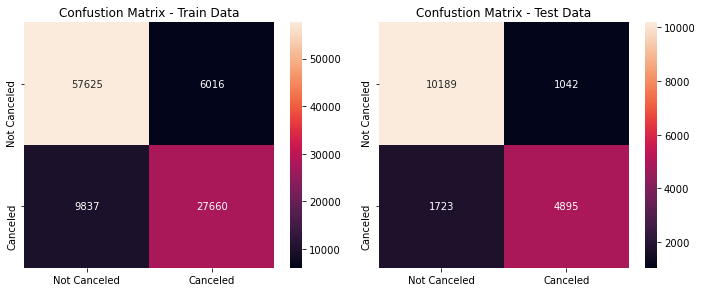

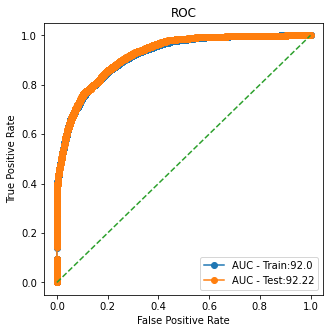

In [222]:
res_df = scores_train_test(gbcl,X_train_sc,X_test_sc,y_train,y_test,gbcl_y_predict_train,gbcl_y_predict_test,'Boost','GradientBoostingClassifier')

In [223]:
tempdf = pd.concat([tempdf,res_df])

In [224]:
report_gen(tempdf,True)

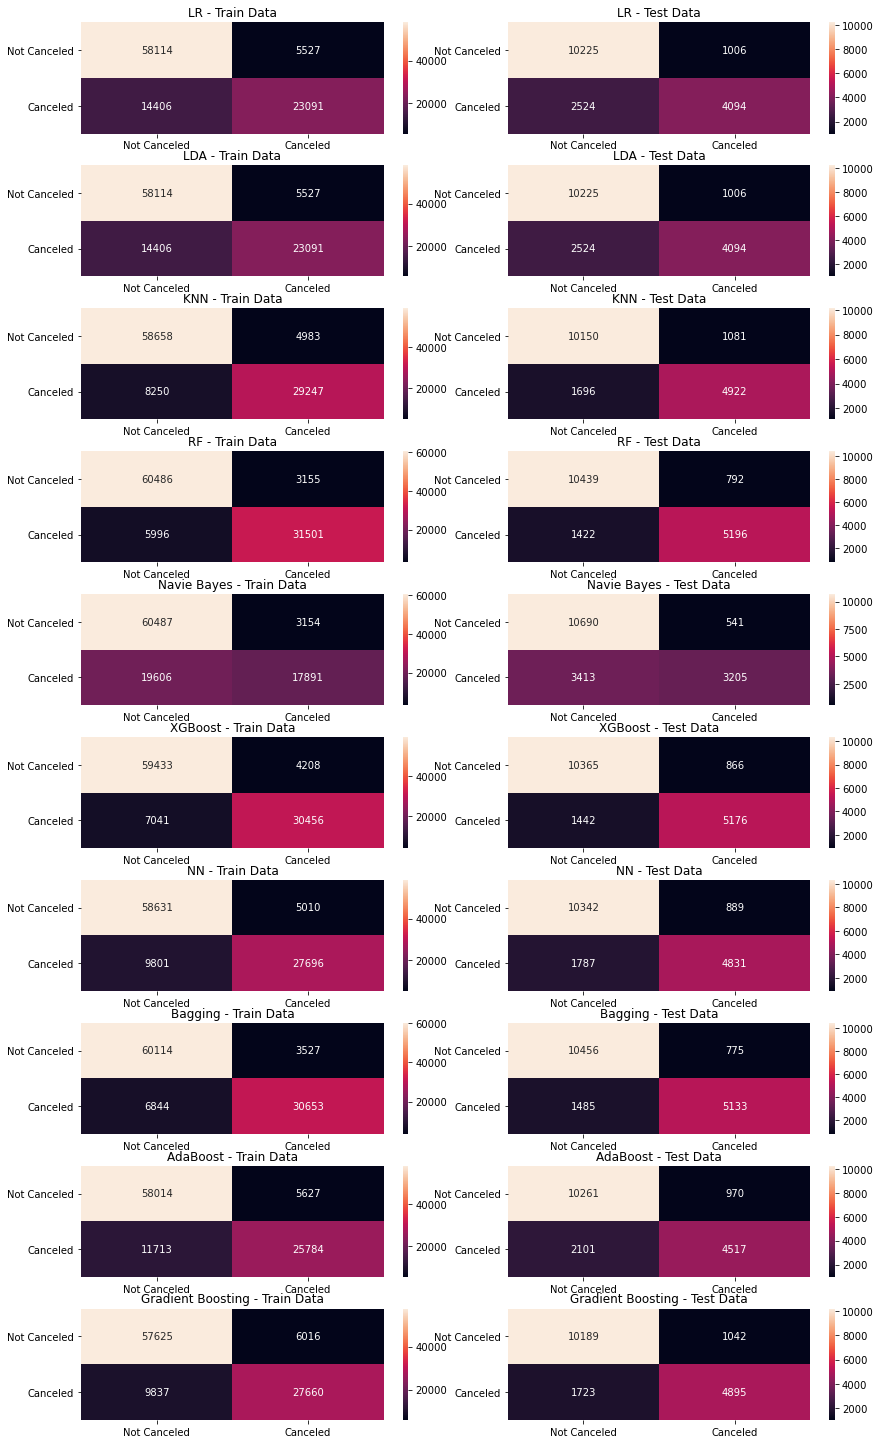

In [225]:
train_preds = [lgr_train,lda_model_ytrain_predict,KNN_train_p,rfcl_y_predict_train,NB_Model_y_predict_train,xgtrainpredict,NNTrainPredict,bgcl_y_predict_train,abcl_y_predict_train,gbcl_y_predict_train]

test_preds = [lgr_test,lda_model_ytest_predict,KNN_test_p,rfcl_y_predict_test,NB_Model_y_predict_test,xgtestpredict,NNTestPredict,bgcl_y_predict_test,abcl_y_predict_test,gbcl_y_predict_test]

mnames = ['LR','LDA','KNN','RF','Navie Bayes','XGBoost','NN','Bagging','AdaBoost','Gradient Boosting']

con_mat_r(y_train,train_preds,y_test,test_preds,2,12,20,mnames)

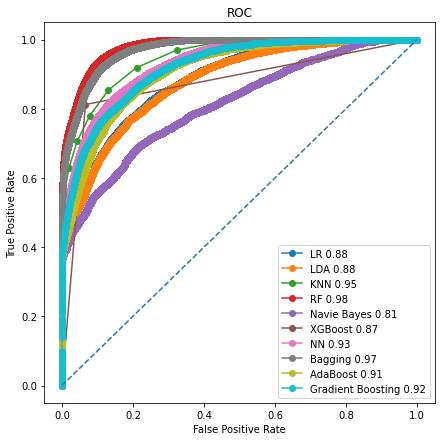

In [226]:
models=[lgr_model,lda_model,KNN_Model,rfcl,NB_model,xgbcl,NNModel,bgcl,abcl,gbcl]
plt.figure(figsize=(7,7))

c=0
for m in models:
    tprobs, tauc, tfpr, ttpr = roc_model(m,X_train_sc,y_train)
    plt.plot(tfpr,ttpr, marker='o', label=mnames[c] + ' ' + str(round(tauc,2)))
    
    c=c+1

plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

plt.show()

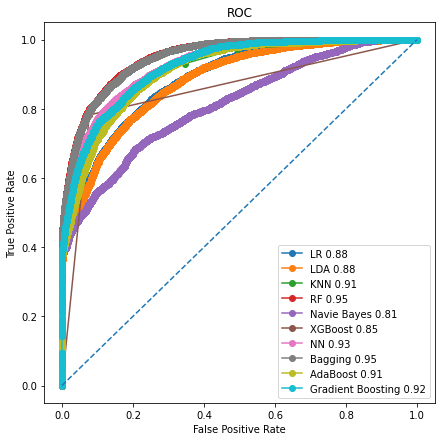

In [227]:
plt.figure(figsize=(7,7))
c=0
for m in models:
    tprobs, tauc, tfpr, ttpr = roc_model(m,X_test_sc,y_test)
    plt.plot(tfpr,ttpr, marker='o', label=mnames[c] + ' ' + str(round(tauc,2)))
    
    c=c+1

plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

plt.show()